# Importing relevant libraries

In [70]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import os
from datetime import datetime

# Import Dataset

In [71]:
import pandas as pd

mitbih_train = pd.read_csv('archive/mitbih_train.csv', header=None) 
mitbih_test = pd.read_csv('archive/mitbih_test.csv', header=None)   

In [72]:
print(mitbih_train.shape)
print(mitbih_test.shape)

(87554, 188)
(21892, 188)


# Preprocessing Data

In [73]:
class ECGDataProcessor:
    """
    Class to handle ECG data preprocessing for multiple datasets
    """
    def __init__(self, mitbih_train_path, mitbih_test_path, incart_path):
        self.mitbih_train_path = mitbih_train_path
        self.mitbih_test_path = mitbih_test_path
        self.incart_path = incart_path
        self.scaler = StandardScaler()

    def load_and_preprocess_mitbih(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        return X_train, y_train,X_test, y_test

    def _print_class_distribution(self, dataset_name, y):
        """
        Print class distribution for a dataset
        """
        print(f"\nClass distribution in {dataset_name} dataset:")
        classes = np.unique(y)
        for class_id in classes:
            count = np.sum(y == class_id)
            percentage = (count / len(y)) * 100
            print(f"Class {class_id}: {count} samples ({percentage:.2f}%)")

    def preprocess_mitbih_data(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        #     # Split temp into validation and test sets
        #val_size_adjusted = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,
            test_size=0.1,
            random_state=42
        )

        # Reshape for RNN input (batch_size, sequence_length, input_size)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        return X_train, X_val, X_test, y_train, y_val, y_test

In [74]:
class ECGDataProcessor:
    """
    Class to handle ECG data preprocessing for multiple datasets
    """
    def __init__(self, mitbih_train_path, mitbih_test_path, incart_path):
        self.mitbih_train_path = mitbih_train_path
        self.mitbih_test_path = mitbih_test_path
        self.incart_path = incart_path
        self.scaler = StandardScaler()

    def load_and_preprocess_mitbih(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        return X_train, y_train,X_test, y_test

    def _print_class_distribution(self, dataset_name, y):
        """
        Print class distribution for a dataset
        """
        print(f"\nClass distribution in {dataset_name} dataset:")
        classes = np.unique(y)
        for class_id in classes:
            count = np.sum(y == class_id)
            percentage = (count / len(y)) * 100
            print(f"Class {class_id}: {count} samples ({percentage:.2f}%)")

    def preprocess_mitbih_data(self):
        """
        Load and preprocess MIT-BIH test dataset
        """
        print("Loading MIT-BIH dataset...")
        df_train = pd.read_csv(self.mitbih_train_path, header=None)
        df_test = pd.read_csv(self.mitbih_test_path, header=None)

        # Separate features and labels
        X_train = df_train.iloc[:, :-1].values
        y_train = df_train.iloc[:, -1].values
        X_test = df_test.iloc[:, :-1].values
        y_test = df_test.iloc[:, -1].values

        print(f"MIT-BIH dataset shape: {X_train.shape}")
        self._print_class_distribution("MIT-BIH", y_train)

        #     # Split temp into validation and test sets
        #val_size_adjusted = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,
            test_size=0.1,
            random_state=42
        )

        # Reshape for RNN input (batch_size, sequence_length, input_size)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        return X_train, X_val, X_test, y_train, y_val, y_test

In [75]:
class ECGDataset(Dataset):
    """
    Custom Dataset class for ECG data
    """
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def create_data_loaders(X_train, X_val, X_test, y_train, y_val, y_test, batch_size=32):
    """
    Create train, validation, and test data loaders
    """
    # Create datasets
    train_dataset = ECGDataset(X_train, y_train)
    val_dataset = ECGDataset(X_val, y_val)
    test_dataset = ECGDataset(X_test, y_test)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader

def plot_sample_signals(X, y, dataset_name, num_samples=3):
    """
    Plot sample ECG signals from each class
    """
    classes = np.unique(y)
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 3*len(classes)))

    for i, class_id in enumerate(classes):
        # Get indices for current class
        class_indices = np.where(y == class_id)[0]
        # Randomly select samples
        sample_indices = np.random.choice(class_indices,
                                        min(num_samples, len(class_indices)),
                                        replace=False)

        for j, idx in enumerate(sample_indices):
            signal = X[idx].reshape(-1) if len(X[idx].shape) > 1 else X[idx]
            axes[i, j].plot(signal)
            axes[i, j].set_title(f'Class {class_id}')
            axes[i, j].set_xticks([])
            if j == 0:
                axes[i, j].set_ylabel('Amplitude')

    plt.suptitle(f'Sample ECG Signals from {dataset_name} Dataset')
    plt.tight_layout()
    plt.show()


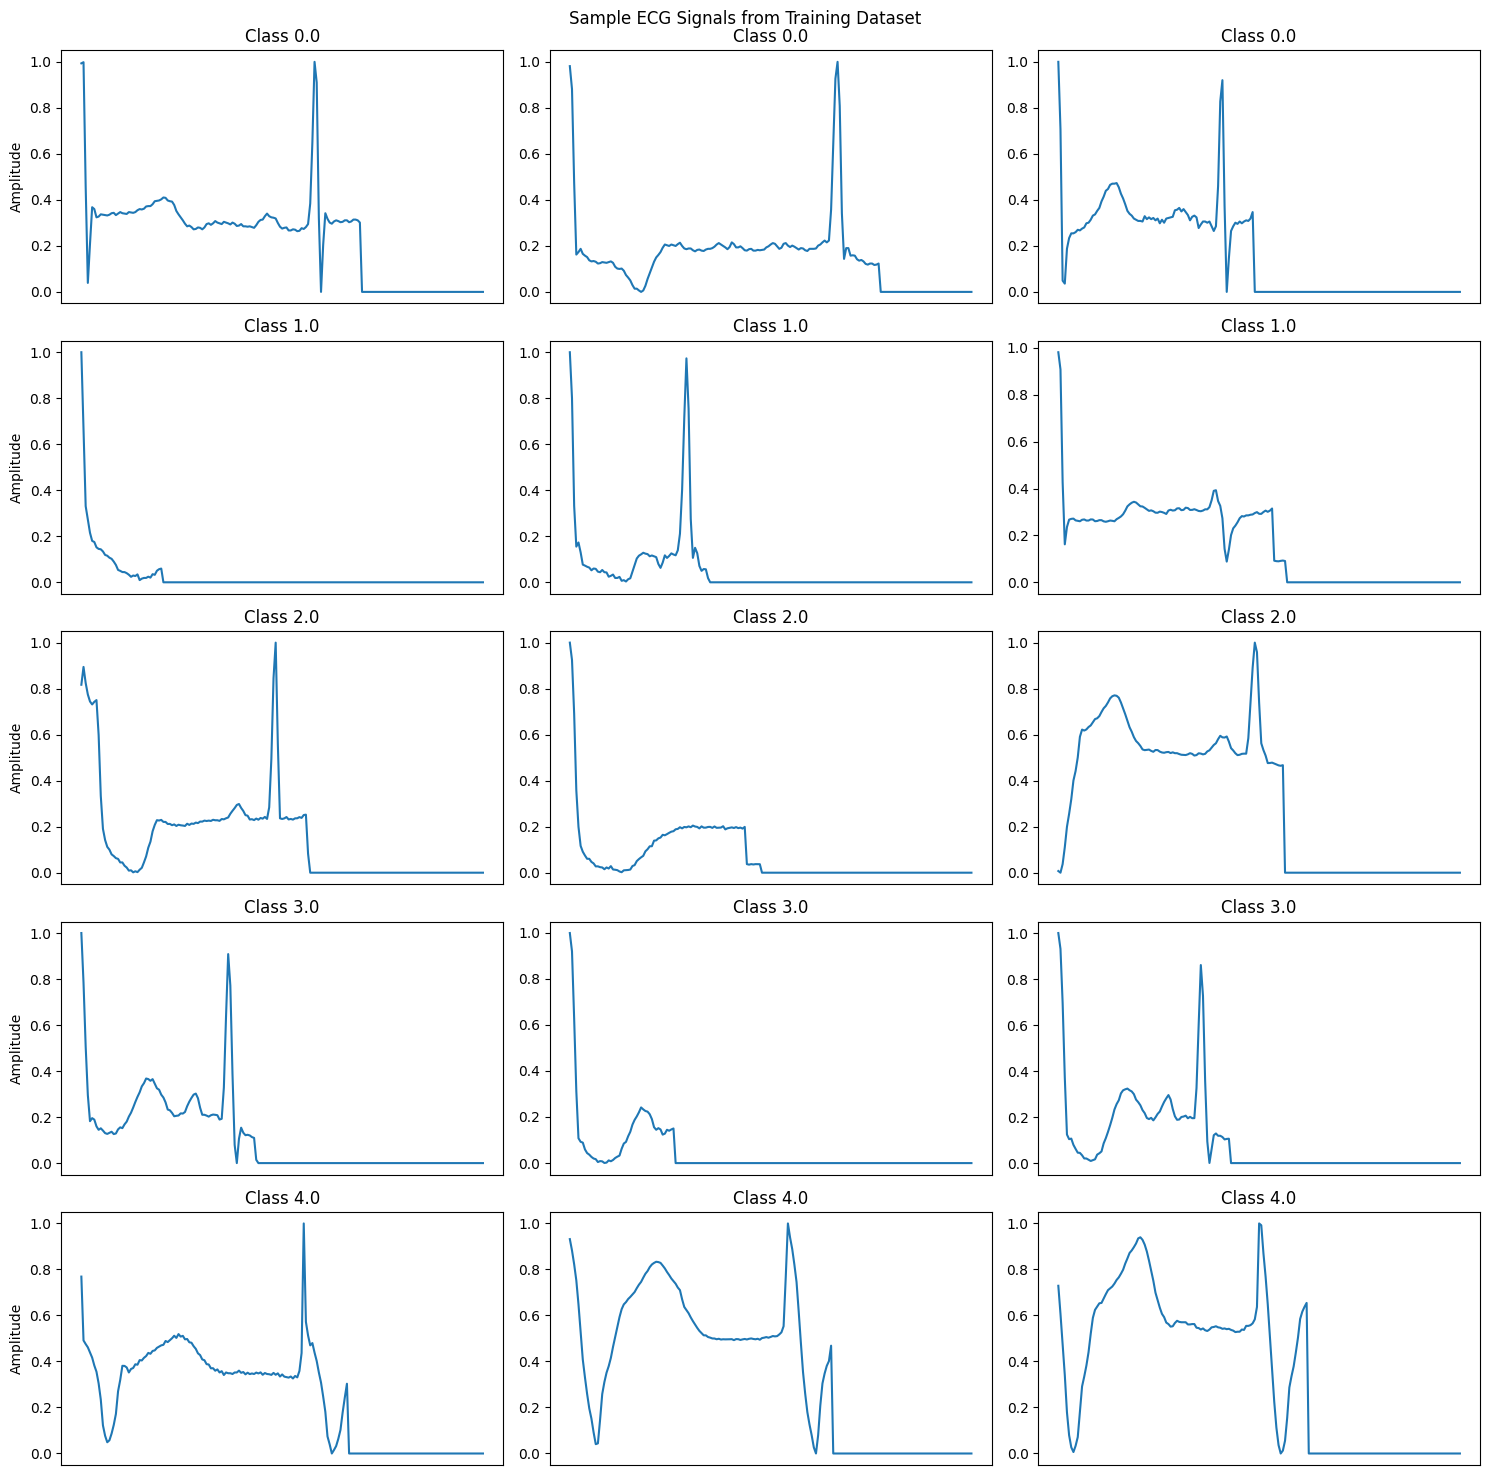


Final dataset sizes:
Training set: (117401, 187, 1)
Validation set: (13045, 187, 1)
Test set: (21892, 187, 1)


In [76]:
 # Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(
    X_train, X_val, X_test, y_train, y_val, y_test
)

# Plot sample signals from each dataset
plot_sample_signals(X_train, y_train, "Training")

# Print final dataset sizes
print("\nFinal dataset sizes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

In [77]:
def get_training_config():
    """
    Returns improved training configuration for both RNN and CNN models
    """
    config = {
        'RNN': {
            'model_params': {
                'input_size': 1,
                'hidden_size': 128,
                'num_layers': 2,
                'num_classes': 5,
                'dropout': 0.3,
            },
            'training_params': {
                'initial_lr': 1e-4,
                'max_lr': 3e-3,
                'batch_size': 64,
                'num_epochs': 100,
                'warmup_epochs': 5,
                'label_smoothing': 0.1,
                'weight_decay': 1e-4,
                'gradient_clip_val': 0.5,
            }
        },
        'CNN': {
            'model_params': {
                'input_channels': 1,
                'sequence_length': 187,
                'num_classes': 5,
            },
            'training_params': {
                'initial_lr': 1e-4,
                'max_lr': 3e-3,
                'batch_size': 64,
                'num_epochs': 100,
                'warmup_epochs': 5,
                'label_smoothing': 0.1,
                'weight_decay': 1e-4,
                'gradient_clip_val': 0.5,
            }
        }
    }
    return config

# CNN Model

In [78]:
class EarlyStopping:
    """Early stopping to stop training when validation loss doesn't improve"""
    def __init__(self, patience=7, min_delta=0, verbose=True):
        """
        Args:
            patience (int): How many epochs to wait after last improvement
            min_delta (float): Minimum change to qualify as an improvement
            verbose (bool): If True, prints a message for each validation loss improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_epoch = 0
        
    def __call__(self, val_loss, epoch):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_epoch = epoch
            if self.verbose:
                print(f'Validation loss improved to {val_loss:.4f}')
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print(f'\nEarly stopping triggered! No improvement for {self.patience} epochs.')
                    print(f'Best validation loss: {self.best_loss:.4f} at epoch {self.best_epoch + 1}')
        else:
            self.best_loss = val_loss
            self.best_epoch = epoch
            self.counter = 0
            if self.verbose:
                print(f'Validation loss improved to {val_loss:.4f}')


class ModelTrainer:
    def __init__(self, model, model_name, device, criterion, config, early_stopping_patience=10):
        self.model = model.to(device)
        self.model_name = model_name
        self.device = device
        self.criterion = criterion
        self.config = config

        # Initialize optimizer with weight decay
        self.optimizer = optim.AdamW(
            self.model.parameters(),
            lr=config['initial_lr'],
            weight_decay=config['weight_decay']
        )

        # Initialize learning rate scheduler
        self.scheduler = CustomLRScheduler(
            self.optimizer,
            config['initial_lr'],
            config['max_lr'],
            config['warmup_epochs'],
            config['num_epochs']
        )

        # Initialize tracking metrics
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.best_val_loss = float('inf')
        
        # Initialize early stopping
        self.early_stopping = EarlyStopping(
            patience=early_stopping_patience,
            min_delta=0.0001,
            verbose=True
        )

        # Create directory for saving models
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.save_dir = os.path.join('models', f"{model_name}_{timestamp}")
        os.makedirs(self.save_dir, exist_ok=True)

    def train_epoch(self, train_loader):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch_X, batch_y in tqdm(train_loader, desc='Training'):
            batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)

            self.optimizer.zero_grad()

            # Handle different model outputs
            if self.model_name == 'RNN':
                outputs, _ = self.model(batch_X)
            else:
                outputs = self.model(batch_X)

            loss = self.criterion(outputs, batch_y)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        return epoch_loss, epoch_acc

    def validate(self, val_loader):
        """Validate the model"""
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)

                if self.model_name == 'RNN':
                    outputs, _ = self.model(batch_X)
                else:
                    outputs = self.model(batch_X)

                loss = self.criterion(outputs, batch_y)
                total_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

        epoch_loss = total_loss / len(val_loader)
        epoch_acc = 100 * correct / total
        return epoch_loss, epoch_acc

    def train(self, train_loader, val_loader, num_epochs):
        """Complete training process with early stopping"""
        print(f"\nStarting training for {self.model_name}...")
        print(f"Early stopping enabled with patience={self.early_stopping.patience}")

        for epoch in range(num_epochs):
            # Training phase
            train_loss, train_acc = self.train_epoch(train_loader)

            # Validation phase
            val_loss, val_acc = self.validate(val_loader)

            # Update learning rate
            self.scheduler.step()
            current_lr = self.optimizer.param_groups[0]['lr']

            # Save metrics
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.train_accuracies.append(train_acc)
            self.val_accuracies.append(val_acc)

            # Print epoch results
            print(f'\nEpoch [{epoch+1}/{num_epochs}]')
            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            print(f'Learning Rate: {current_lr:.6f}')

            # Save best model
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_model('best_model.pth')
                print(f'✓ New best model saved! (Val Loss: {val_loss:.4f})')

            # Early stopping check
            self.early_stopping(val_loss, epoch)
            if self.early_stopping.early_stop:
                print(f'\n{"="*60}')
                print(f'Training stopped early at epoch {epoch+1}')
                print(f'Best validation loss: {self.early_stopping.best_loss:.4f}')
                print(f'Best epoch: {self.early_stopping.best_epoch + 1}')
                print(f'{"="*60}\n')
                break

        # Save final model
        self.save_model('final_model.pth')
        
        # Print training summary
        print(f'\n{"="*60}')
        print(f'Training Summary for {self.model_name}')
        print(f'{"="*60}')
        print(f'Total epochs trained: {len(self.train_losses)}')
        print(f'Best validation loss: {self.best_val_loss:.4f}')
        print(f'Final train accuracy: {self.train_accuracies[-1]:.2f}%')
        print(f'Final validation accuracy: {self.val_accuracies[-1]:.2f}%')
        print(f'{"="*60}\n')

    def save_model(self, filename):
        """Save model checkpoint"""
        path = os.path.join(self.save_dir, filename)
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'train_accuracies': self.train_accuracies,
            'val_accuracies': self.val_accuracies,
            'config': self.config,
            'best_val_loss': self.best_val_loss,
            'early_stopping_info': {
                'stopped_early': self.early_stopping.early_stop,
                'best_epoch': self.early_stopping.best_epoch,
                'patience': self.early_stopping.patience
            }
        }, path)

    def plot_training_history(self):
        """Plot training metrics with early stopping indicator"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        epochs = range(1, len(self.train_losses) + 1)

        # Plot losses
        ax1.plot(epochs, self.train_losses, label='Training Loss', marker='o', markersize=3)
        ax1.plot(epochs, self.val_losses, label='Validation Loss', marker='s', markersize=3)
        
        # Mark best epoch
        best_epoch = self.early_stopping.best_epoch + 1
        if best_epoch <= len(self.val_losses):
            ax1.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.5, label=f'Best Epoch ({best_epoch})')
        
        ax1.set_title(f'{self.model_name} - Training History (Loss)')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot accuracies
        ax2.plot(epochs, self.train_accuracies, label='Training Accuracy', marker='o', markersize=3)
        ax2.plot(epochs, self.val_accuracies, label='Validation Accuracy', marker='s', markersize=3)
        
        # Mark best epoch
        if best_epoch <= len(self.val_accuracies):
            ax2.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.5, label=f'Best Epoch ({best_epoch})')
        
        ax2.set_title(f'{self.model_name} - Training History (Accuracy)')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(os.path.join(self.save_dir, 'training_history.png'), dpi=300, bbox_inches='tight')
        plt.show()

    def evaluate(self, test_loader):
        self.model.eval()
        predictions = []
        true_labels = []

        with torch.no_grad():
            for batch_X, batch_y in tqdm(test_loader, desc='Testing'):
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)

                if self.model_name == 'RNN':
                    outputs, _ = self.model(batch_X)
                else:
                    outputs = self.model(batch_X)

                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.cpu().numpy())
                true_labels.extend(batch_y.cpu().numpy())

        # Print classification report
        print(f"\nClassification Report ({self.model_name}):")
        print(classification_report(true_labels, predictions))

        # Plot confusion matrix
        cm = confusion_matrix(true_labels, predictions)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix ({self.model_name})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(os.path.join(self.save_dir, 'confusion_matrix.png'), dpi=300, bbox_inches='tight')
        plt.show()

In [79]:
class ImprovedResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.3):
        super(ImprovedResidualBlock, self).__init__()
        
        self.conv_block = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, stride=1, padding=3),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout1d(dropout_rate),
            nn.Conv1d(out_channels, out_channels, kernel_size=7, stride=1, padding=3),
            nn.BatchNorm1d(out_channels)
        )
        
        self.skip_connection = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1),
            nn.BatchNorm1d(out_channels)
        ) if in_channels != out_channels else nn.Identity()
        
        self.dropout = nn.Dropout1d(dropout_rate)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = self.skip_connection(x)
        x = self.conv_block(x)
        x = self.dropout(x + residual)
        x = self.relu(x)
        return x
    
class SmoothCrossEntropyLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(SmoothCrossEntropyLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, pred, target):
        n_classes = pred.size(1)
        target_one_hot = torch.zeros_like(pred).scatter(1, target.unsqueeze(1), 1)
        smoothed_target = target_one_hot * (1 - self.smoothing) + self.smoothing / n_classes
        return torch.mean(torch.sum(-smoothed_target * torch.log_softmax(pred, dim=1), dim=1))
    
class CustomLRScheduler:
    def __init__(self, optimizer, initial_lr, max_lr, warmup_epochs, total_epochs):
        self.optimizer = optimizer
        self.initial_lr = initial_lr
        self.max_lr = max_lr
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        self.current_epoch = 0

    def step(self):
        self.current_epoch += 1
        if self.current_epoch <= self.warmup_epochs:
            # Linear warmup
            lr = self.initial_lr + (self.max_lr - self.initial_lr) * (self.current_epoch / self.warmup_epochs)
        else:
            # Cosine annealing
            progress = (self.current_epoch - self.warmup_epochs) / (self.total_epochs - self.warmup_epochs)
            lr = self.initial_lr + 0.5 * (self.max_lr - self.initial_lr) * (1 + np.cos(progress * np.pi))

        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr

        return lr

In [80]:
class ECG_CNN(nn.Module):
    def __init__(self, input_channels=1, sequence_length=187, num_classes=5):
        """
        Improved CNN model for ECG classification with:
        - Increased regularization
        - Label smoothing
        - Larger kernel sizes for ECG patterns
        - Spatial dropout
        """
        super(ECG_CNN, self).__init__()
        
        # First convolutional block with larger kernel
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=15, stride=1, padding=7),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout1d(0.2),  # Spatial dropout
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        # Improved residual blocks with increased regularization
        self.res_block1 = ImprovedResidualBlock(32, 64, dropout_rate=0.3)
        self.res_block2 = ImprovedResidualBlock(64, 128, dropout_rate=0.3)
        self.res_block3 = ImprovedResidualBlock(128, 256, dropout_rate=0.3)
        
        # Calculate the size of flattened features
        self._feature_size = self._get_feature_size(input_channels, sequence_length)
        
        # Improved fully connected layers with stronger regularization
        self.fc_layers = nn.Sequential(
            nn.Linear(self._feature_size, 512),
            nn.LayerNorm(512),  # Layer normalization
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )
        
        # Initialize weights with a better scaling factor
        self.apply(self._init_weights)
    
    def _get_feature_size(self, input_channels, sequence_length):
        """Calculate the size of flattened features after convolutions"""
        # Create a dummy tensor to forward through the network
        x = torch.randn(1, input_channels, sequence_length)
        x = self.conv1(x)
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        
        # Return the flattened size
        return x.view(1, -1).size(1)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Conv1d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu', a=0.1)
        elif isinstance(m, nn.BatchNorm1d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # Input shape: (batch_size, sequence_length, input_channels)
        # Reshape for 1D convolution
        x = x.transpose(1, 2)
        
        # Convolutional layers
        x = self.conv1(x)
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        
        # Flatten
        batch_size = x.size(0)
        x = x.view(batch_size, -1)
        
        # Fully connected layers
        x = self.fc_layers(x)
        
        return x

In [81]:
def get_training_config():
    config = {
        'CNN': {
            'model_params': {
                'input_channels': 1,
                'sequence_length': 187,
                'num_classes': 5,
            },
            'training_params': {
                'initial_lr': 1e-4,  # Lower initial learning rate
                'max_lr': 3e-3,      # Maximum learning rate for cyclical schedule
                'batch_size': 64,    # Increased batch size
                'num_epochs': 100,   # More epochs for gradual learning
                'warmup_epochs': 5,  # Gradual warmup
                'label_smoothing': 0.1,
                'weight_decay': 1e-4,  # Increased weight decay
                'gradient_clip_val': 0.5,
            }
        }
    }
    return config

In [82]:
def train_cnn_model(X_train, X_val, X_test, y_train, y_val, y_test):
    """Train CNN models"""
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Get configurations
    config = get_training_config()
    
    # Create data loaders
    train_dataset = ECGDataset(X_train, y_train)
    val_dataset = ECGDataset(X_val, y_val)
    test_dataset = ECGDataset(X_test, y_test)
    
    batch_size = config['CNN']['training_params']['batch_size']
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Initialize models
    cnn_model = ECG_CNN(**config['CNN']['model_params'])
    
    # Initialize criterion with label smoothing
    cnn_criterion = SmoothCrossEntropyLoss(smoothing=config['CNN']['training_params']['label_smoothing'])
   
    # Train CNN
    cnn_trainer = ModelTrainer(
        model=cnn_model,
        model_name='CNN',
        device=device,
        criterion=cnn_criterion,
        config=config['CNN']['training_params']
    )
    cnn_trainer.train(
        train_loader,
        val_loader,
        config['CNN']['training_params']['num_epochs']
    )
    cnn_trainer.plot_training_history()
    cnn_trainer.evaluate(test_loader)
    
    return cnn_trainer

In [83]:
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))  

True
NVIDIA GeForce RTX 2070 SUPER



Updated configuration:
Number of classes: 5
Sequence length: 187
Using device: cuda

Starting training for CNN...
Early stopping enabled with patience=10


Training: 100%|██████████| 1835/1835 [00:29<00:00, 63.24it/s]



Epoch [1/100]
Train Loss: 0.8119, Train Acc: 80.44%
Val Loss: 0.6042, Val Acc: 90.46%
Learning Rate: 0.000680
✓ New best model saved! (Val Loss: 0.6042)
Validation loss improved to 0.6042


Training: 100%|██████████| 1835/1835 [00:28<00:00, 64.33it/s]



Epoch [2/100]
Train Loss: 0.5801, Train Acc: 91.59%
Val Loss: 0.4790, Val Acc: 96.07%
Learning Rate: 0.001260
✓ New best model saved! (Val Loss: 0.4790)
Validation loss improved to 0.4790


Training: 100%|██████████| 1835/1835 [00:28<00:00, 64.21it/s]



Epoch [3/100]
Train Loss: 0.5137, Train Acc: 94.69%
Val Loss: 0.4505, Val Acc: 97.38%
Learning Rate: 0.001840
✓ New best model saved! (Val Loss: 0.4505)
Validation loss improved to 0.4505


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.90it/s]



Epoch [4/100]
Train Loss: 0.4833, Train Acc: 96.11%
Val Loss: 0.4375, Val Acc: 97.75%
Learning Rate: 0.002420
✓ New best model saved! (Val Loss: 0.4375)
Validation loss improved to 0.4375


Training: 100%|██████████| 1835/1835 [00:28<00:00, 64.03it/s]



Epoch [5/100]
Train Loss: 0.4669, Train Acc: 96.83%
Val Loss: 0.4270, Val Acc: 98.37%
Learning Rate: 0.003000
✓ New best model saved! (Val Loss: 0.4270)
Validation loss improved to 0.4270


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.88it/s]



Epoch [6/100]
Train Loss: 0.4558, Train Acc: 97.34%
Val Loss: 0.4213, Val Acc: 98.83%
Learning Rate: 0.002999
✓ New best model saved! (Val Loss: 0.4213)
Validation loss improved to 0.4213


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.65it/s]



Epoch [7/100]
Train Loss: 0.4437, Train Acc: 97.87%
Val Loss: 0.4204, Val Acc: 98.64%
Learning Rate: 0.002997
✓ New best model saved! (Val Loss: 0.4204)
Validation loss improved to 0.4204


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.88it/s]



Epoch [8/100]
Train Loss: 0.4352, Train Acc: 98.31%
Val Loss: 0.4140, Val Acc: 98.90%
Learning Rate: 0.002993
✓ New best model saved! (Val Loss: 0.4140)
Validation loss improved to 0.4140


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.78it/s]



Epoch [9/100]
Train Loss: 0.4287, Train Acc: 98.57%
Val Loss: 0.4121, Val Acc: 99.01%
Learning Rate: 0.002987
✓ New best model saved! (Val Loss: 0.4121)
Validation loss improved to 0.4121


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.77it/s]



Epoch [10/100]
Train Loss: 0.4244, Train Acc: 98.78%
Val Loss: 0.4098, Val Acc: 99.16%
Learning Rate: 0.002980
✓ New best model saved! (Val Loss: 0.4098)
Validation loss improved to 0.4098


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.76it/s]



Epoch [11/100]
Train Loss: 0.4211, Train Acc: 98.93%
Val Loss: 0.4071, Val Acc: 99.33%
Learning Rate: 0.002972
✓ New best model saved! (Val Loss: 0.4071)
Validation loss improved to 0.4071


Training: 100%|██████████| 1835/1835 [00:29<00:00, 62.87it/s]



Epoch [12/100]
Train Loss: 0.4183, Train Acc: 99.04%
Val Loss: 0.4058, Val Acc: 99.25%
Learning Rate: 0.002961
✓ New best model saved! (Val Loss: 0.4058)
Validation loss improved to 0.4058


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.41it/s]



Epoch [13/100]
Train Loss: 0.4154, Train Acc: 99.17%
Val Loss: 0.4106, Val Acc: 99.32%
Learning Rate: 0.002950
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.39it/s]



Epoch [14/100]
Train Loss: 0.4142, Train Acc: 99.23%
Val Loss: 0.4046, Val Acc: 99.44%
Learning Rate: 0.002936
✓ New best model saved! (Val Loss: 0.4046)
Validation loss improved to 0.4046


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.36it/s]



Epoch [15/100]
Train Loss: 0.4118, Train Acc: 99.34%
Val Loss: 0.4058, Val Acc: 99.34%
Learning Rate: 0.002921
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.41it/s]



Epoch [16/100]
Train Loss: 0.4116, Train Acc: 99.31%
Val Loss: 0.4055, Val Acc: 99.40%
Learning Rate: 0.002905
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.39it/s]



Epoch [17/100]
Train Loss: 0.4095, Train Acc: 99.42%
Val Loss: 0.4005, Val Acc: 99.56%
Learning Rate: 0.002887
✓ New best model saved! (Val Loss: 0.4005)
Validation loss improved to 0.4005


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.45it/s]



Epoch [18/100]
Train Loss: 0.4086, Train Acc: 99.47%
Val Loss: 0.4043, Val Acc: 99.46%
Learning Rate: 0.002868
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:28<00:00, 63.34it/s]



Epoch [19/100]
Train Loss: 0.4081, Train Acc: 99.50%
Val Loss: 0.4038, Val Acc: 99.45%
Learning Rate: 0.002847
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.64it/s]



Epoch [20/100]
Train Loss: 0.4072, Train Acc: 99.53%
Val Loss: 0.4016, Val Acc: 99.56%
Learning Rate: 0.002825
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.83it/s]



Epoch [21/100]
Train Loss: 0.4058, Train Acc: 99.56%
Val Loss: 0.4031, Val Acc: 99.50%
Learning Rate: 0.002802
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.42it/s]



Epoch [22/100]
Train Loss: 0.4062, Train Acc: 99.54%
Val Loss: 0.4053, Val Acc: 99.40%
Learning Rate: 0.002777
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.76it/s]



Epoch [23/100]
Train Loss: 0.4057, Train Acc: 99.58%
Val Loss: 0.4012, Val Acc: 99.59%
Learning Rate: 0.002751
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.21it/s]



Epoch [24/100]
Train Loss: 0.4049, Train Acc: 99.62%
Val Loss: 0.4028, Val Acc: 99.47%
Learning Rate: 0.002723
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.15it/s]



Epoch [25/100]
Train Loss: 0.4042, Train Acc: 99.64%
Val Loss: 0.4020, Val Acc: 99.49%
Learning Rate: 0.002694
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.65it/s]



Epoch [26/100]
Train Loss: 0.4034, Train Acc: 99.68%
Val Loss: 0.4001, Val Acc: 99.59%
Learning Rate: 0.002664
✓ New best model saved! (Val Loss: 0.4001)
Validation loss improved to 0.4001


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.42it/s]



Epoch [27/100]
Train Loss: 0.4030, Train Acc: 99.70%
Val Loss: 0.4028, Val Acc: 99.55%
Learning Rate: 0.002633
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.57it/s]



Epoch [28/100]
Train Loss: 0.4031, Train Acc: 99.68%
Val Loss: 0.4000, Val Acc: 99.56%
Learning Rate: 0.002600
✓ New best model saved! (Val Loss: 0.4000)
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.24it/s]



Epoch [29/100]
Train Loss: 0.4029, Train Acc: 99.69%
Val Loss: 0.3990, Val Acc: 99.62%
Learning Rate: 0.002567
✓ New best model saved! (Val Loss: 0.3990)
Validation loss improved to 0.3990


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.07it/s]



Epoch [30/100]
Train Loss: 0.4016, Train Acc: 99.76%
Val Loss: 0.3992, Val Acc: 99.61%
Learning Rate: 0.002532
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.90it/s]



Epoch [31/100]
Train Loss: 0.4018, Train Acc: 99.74%
Val Loss: 0.3986, Val Acc: 99.65%
Learning Rate: 0.002496
✓ New best model saved! (Val Loss: 0.3986)
Validation loss improved to 0.3986


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.27it/s]



Epoch [32/100]
Train Loss: 0.4019, Train Acc: 99.73%
Val Loss: 0.4005, Val Acc: 99.62%
Learning Rate: 0.002459
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.01it/s]



Epoch [33/100]
Train Loss: 0.4010, Train Acc: 99.78%
Val Loss: 0.3998, Val Acc: 99.64%
Learning Rate: 0.002422
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.88it/s]



Epoch [34/100]
Train Loss: 0.4012, Train Acc: 99.76%
Val Loss: 0.3992, Val Acc: 99.63%
Learning Rate: 0.002383
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.99it/s]



Epoch [35/100]
Train Loss: 0.4007, Train Acc: 99.79%
Val Loss: 0.4002, Val Acc: 99.60%
Learning Rate: 0.002343
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.56it/s]



Epoch [36/100]
Train Loss: 0.4005, Train Acc: 99.79%
Val Loss: 0.3989, Val Acc: 99.66%
Learning Rate: 0.002303
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.59it/s]



Epoch [37/100]
Train Loss: 0.4001, Train Acc: 99.81%
Val Loss: 0.3991, Val Acc: 99.63%
Learning Rate: 0.002261
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 59.60it/s]



Epoch [38/100]
Train Loss: 0.3997, Train Acc: 99.83%
Val Loss: 0.3981, Val Acc: 99.69%
Learning Rate: 0.002219
✓ New best model saved! (Val Loss: 0.3981)
Validation loss improved to 0.3981


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.84it/s]



Epoch [39/100]
Train Loss: 0.3996, Train Acc: 99.82%
Val Loss: 0.3995, Val Acc: 99.64%
Learning Rate: 0.002176
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.60it/s]



Epoch [40/100]
Train Loss: 0.3998, Train Acc: 99.81%
Val Loss: 0.4011, Val Acc: 99.62%
Learning Rate: 0.002132
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.78it/s]



Epoch [41/100]
Train Loss: 0.3994, Train Acc: 99.84%
Val Loss: 0.3988, Val Acc: 99.69%
Learning Rate: 0.002088
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.08it/s]



Epoch [42/100]
Train Loss: 0.3991, Train Acc: 99.83%
Val Loss: 0.4004, Val Acc: 99.60%
Learning Rate: 0.002043
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 61.03it/s]



Epoch [43/100]
Train Loss: 0.3993, Train Acc: 99.84%
Val Loss: 0.4005, Val Acc: 99.56%
Learning Rate: 0.001998
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.63it/s]



Epoch [44/100]
Train Loss: 0.3988, Train Acc: 99.86%
Val Loss: 0.4006, Val Acc: 99.61%
Learning Rate: 0.001952
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.71it/s]



Epoch [45/100]
Train Loss: 0.3984, Train Acc: 99.88%
Val Loss: 0.3981, Val Acc: 99.66%
Learning Rate: 0.001906
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.86it/s]



Epoch [46/100]
Train Loss: 0.3985, Train Acc: 99.87%
Val Loss: 0.3981, Val Acc: 99.70%
Learning Rate: 0.001859
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.82it/s]



Epoch [47/100]
Train Loss: 0.3983, Train Acc: 99.87%
Val Loss: 0.3983, Val Acc: 99.64%
Learning Rate: 0.001812
EarlyStopping counter: 9 out of 10


Training: 100%|██████████| 1835/1835 [00:30<00:00, 60.49it/s]



Epoch [48/100]
Train Loss: 0.3982, Train Acc: 99.88%
Val Loss: 0.3981, Val Acc: 99.66%
Learning Rate: 0.001765
EarlyStopping counter: 10 out of 10

Early stopping triggered! No improvement for 10 epochs.
Best validation loss: 0.3981 at epoch 38

Training stopped early at epoch 48
Best validation loss: 0.3981
Best epoch: 38


Training Summary for CNN
Total epochs trained: 48
Best validation loss: 0.3981
Final train accuracy: 99.88%
Final validation accuracy: 99.66%



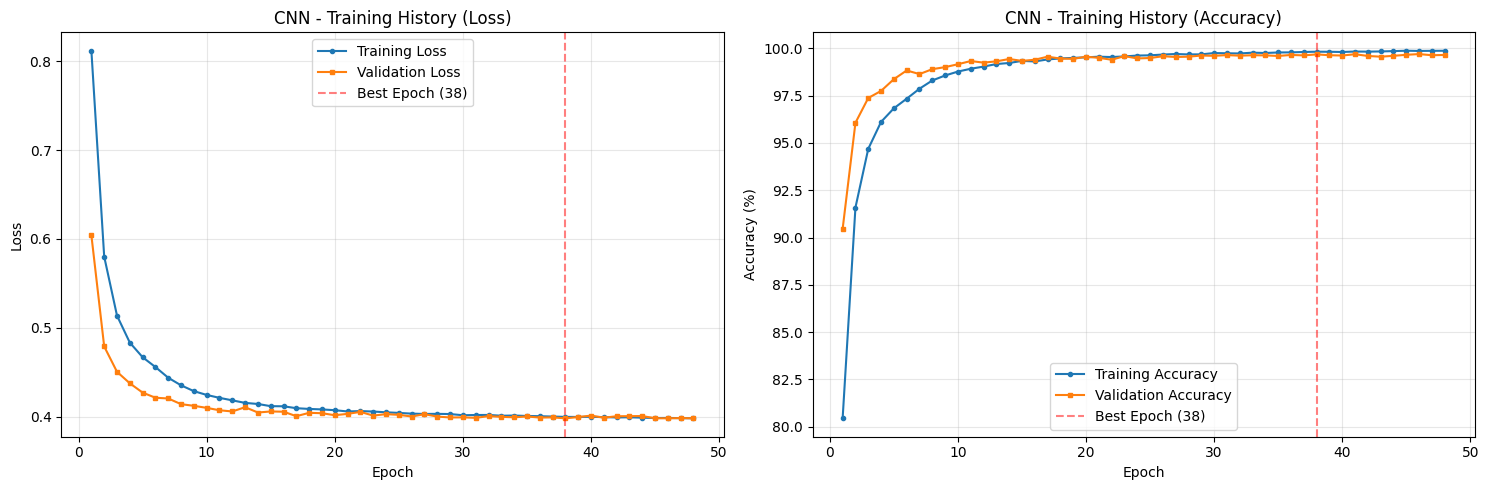

Testing: 100%|██████████| 343/343 [00:01<00:00, 237.06it/s]



Classification Report (CNN):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.87      0.82      0.84       556
           2       0.96      0.96      0.96      1448
           3       0.76      0.82      0.79       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.91      0.92      0.91     21892
weighted avg       0.99      0.99      0.99     21892



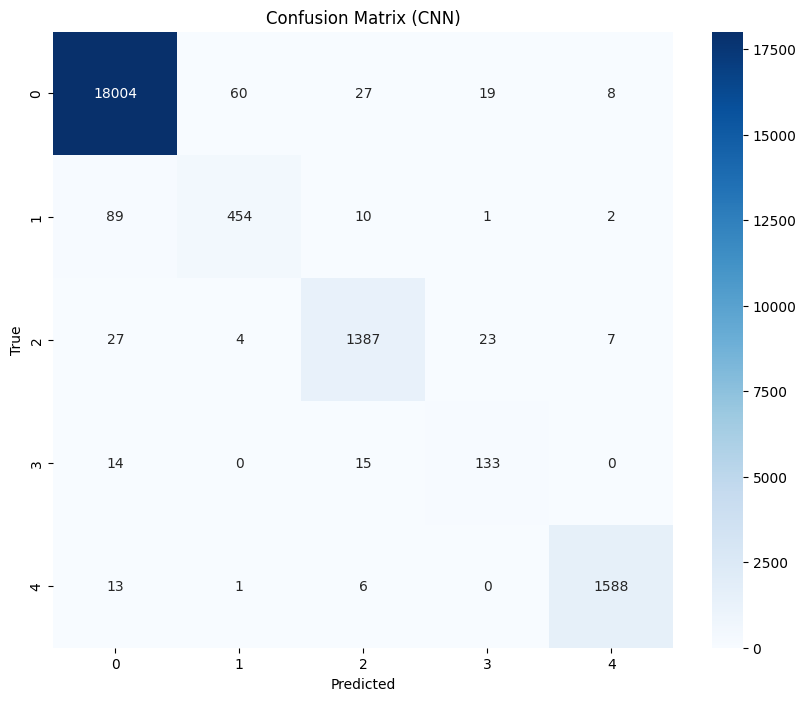

In [85]:
 # Update configuration based on actual data
config = get_training_config()
num_classes = len(np.unique(y_train))
sequence_length = X_train.shape[1]

# Update both model configurations
config['CNN']['model_params']['num_classes'] = num_classes
config['CNN']['model_params']['sequence_length'] = sequence_length

print("\nUpdated configuration:")
print(f"Number of classes: {num_classes}")
print(f"Sequence length: {sequence_length}")

# Train models
cnn_trainer = train_cnn_model(X_train, X_val, X_test, y_train, y_val, y_test)

In [86]:
torch.save({
            'model_state_dict': cnn_trainer.model.state_dict(),
            'optimizer_state_dict': cnn_trainer.optimizer.state_dict(),
            'train_losses': cnn_trainer.train_losses,
            'val_losses': cnn_trainer.val_losses,
            'train_accuracies': cnn_trainer.train_accuracies,
            'val_accuracies': cnn_trainer.val_accuracies,
            'config': cnn_trainer.config
        }, 'cnn_final_model.pth')

# CNN From the Research Paper
https://arxiv.org/pdf/1805.00794

In [ ]:
class ResidualBlock1D(nn.Module):
    """
    Residual block as described in the paper:
    - 2 convolutional layers (32 filters, kernel size 5)
    - 2 ReLU activations
    - 1 skip connection
    - 1 max pooling layer (size 5, stride 2)
    """
    def __init__(self, in_channels, out_channels=32, kernel_size=5, pool_size=5, pool_stride=2):
        super(ResidualBlock1D, self).__init__()
        
        # First conv layer
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu1 = nn.ReLU()
        
        # Second conv layer
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.relu2 = nn.ReLU()
        
        # Skip connection (1x1 conv if channels don't match)
        self.skip_connection = nn.Conv1d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()
        
        # Max pooling
        self.pool = nn.MaxPool1d(kernel_size=pool_size, stride=pool_stride)
        
    def forward(self, x):
        # Store input for skip connection
        identity = self.skip_connection(x)
        
        # First conv block
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        
        # Second conv block
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Add skip connection
        out = out + identity
        out = self.relu2(out)
        
        # Max pooling
        out = self.pool(out)
        
        return out


class ECG_CNN_Paper(nn.Module):
    """
    - 5 residual blocks (each with 2 conv layers, 32 filters, kernel size 5)
    - 2 fully connected layers (32 neurons each)
    - 1 softmax output layer
    - Total: 13 weight layers (10 conv + 2 FC + 1 output)
    """
    def __init__(self, input_channels=1, num_classes=5, dropout_rate=0.3):
        super(ECG_CNN_Paper, self).__init__()
        
        print("Initializing ECG_CNN_Paper model...")
        
        # 5 Residual blocks (all use 32 filters, kernel size 5, pool size 5, stride 2)
        self.res_block1 = ResidualBlock1D(input_channels, 32)
        self.res_block2 = ResidualBlock1D(32, 32)
        self.res_block3 = ResidualBlock1D(32, 32)
        self.res_block4 = ResidualBlock1D(32, 32)
        self.res_block5 = ResidualBlock1D(32, 32)
        
        # Dropout for regularization (not mentioned in paper but helps prevent overfitting)
        self.dropout = nn.Dropout(dropout_rate)
        
        # Calculate flattened feature size
        self._feature_size = self._get_feature_size(input_channels)
        print(f"Feature size after convolutions: {self._feature_size}")
        
        # 2 Fully connected layers with 32 neurons each
        self.fc1 = nn.Linear(self._feature_size, 32)
        self.relu_fc1 = nn.ReLU()
        
        self.fc2 = nn.Linear(32, 32)
        self.relu_fc2 = nn.ReLU()
        
        # Output layer (softmax applied in loss function)
        self.fc3 = nn.Linear(32, num_classes)
        
        # Initialize weights
        self._init_weights()
        
    def _get_feature_size(self, input_channels):
        """Calculate the size of flattened features after all conv blocks"""
        # Use a sample input to determine output size
        # Assuming input sequence length of 187 (from MIT-BIH dataset)
        x = torch.randn(1, input_channels, 187)
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        x = self.res_block5(x)
        
        return x.view(1, -1).size(1)
    
    def _init_weights(self):
        """Initialize weights using He initialization for ReLU"""
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        """
        Forward pass
        Input shape: (batch_size, sequence_length, input_channels)
        Output shape: (batch_size, num_classes)
        """
        # Reshape for 1D convolution: (batch, channels, sequence)
        x = x.transpose(1, 2)
        
        # 5 Residual blocks
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        x = self.res_block5(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.relu_fc1(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu_fc2(x)
        x = self.dropout(x)
        
        # Output layer
        x = self.fc3(x)
        
        return x
    
    def count_parameters(self):
        """Count total and trainable parameters"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"\nModel Parameters:")
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")
        return total_params, trainable_params

In [88]:
def get_paper_cnn_config():
    """
    Configuration specifically for the paper's CNN architecture
    """
    config = {
        'model_params': {
            'input_channels': 1,
            'num_classes': 5,
            'dropout_rate': 0.3,  # Added for regularization
        },
        'training_params': {
            'initial_lr': 1e-4,
            'max_lr': 1e-3,  # Paper doesn't specify, using moderate value
            'batch_size': 128,  # Common batch size for ECG classification
            'num_epochs': 100,
            'warmup_epochs': 5,
            'label_smoothing': 0.0,  # Paper doesn't mention this
            'weight_decay': 1e-4,
            'gradient_clip_val': 1.0,
        }
    }
    return config


def train_paper_cnn_model(X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Train the CNN model from the paper
    """
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Get configuration
    config = get_paper_cnn_config()
    
    # Update num_classes based on actual data
    num_classes = len(np.unique(y_train))
    config['model_params']['num_classes'] = num_classes
    print(f"\nNumber of classes: {num_classes}")
    print(f"Sequence length: {X_train.shape[1]}")
    
    # Create data loaders
    train_dataset = ECGDataset(X_train, y_train)
    val_dataset = ECGDataset(X_val, y_val)
    test_dataset = ECGDataset(X_test, y_test)
    
    batch_size = config['training_params']['batch_size']
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0)
    
    # Initialize model
    model = ECG_CNN_Paper(**config['model_params'])
    model.count_parameters()
    
    # Initialize criterion
    if config['training_params']['label_smoothing'] > 0:
        criterion = SmoothCrossEntropyLoss(smoothing=config['training_params']['label_smoothing'])
    else:
        criterion = nn.CrossEntropyLoss()
    
    # Train model
    trainer = ModelTrainer(
        model=model,
        model_name='CNN_Paper',
        device=device,
        criterion=criterion,
        config=config['training_params']
    )
    
    trainer.train(
        train_loader,
        val_loader,
        config['training_params']['num_epochs']
    )
    
    # Plot training history
    trainer.plot_training_history()
    
    # Evaluate on test set
    print("\n" + "="*50)
    print("FINAL EVALUATION ON TEST SET")
    print("="*50)
    trainer.evaluate(test_loader)
    
    return trainer, model

Training CNN model from paper...
Using device: cuda

Number of classes: 5
Sequence length: 187
Initializing ECG_CNN_Paper model...
Feature size after convolutions: 64

Model Parameters:
Total parameters: 50,565
Trainable parameters: 50,565

Starting training for CNN_Paper...
Early stopping enabled with patience=10


Training: 100%|██████████| 918/918 [00:09<00:00, 100.29it/s]



Epoch [1/100]
Train Loss: 9.5272, Train Acc: 30.55%
Val Loss: 1.3656, Val Acc: 47.87%
Learning Rate: 0.000280
✓ New best model saved! (Val Loss: 1.3656)
Validation loss improved to 1.3656


Training: 100%|██████████| 918/918 [00:08<00:00, 103.48it/s]



Epoch [2/100]
Train Loss: 1.1785, Train Acc: 53.35%
Val Loss: 0.6334, Val Acc: 70.69%
Learning Rate: 0.000460
✓ New best model saved! (Val Loss: 0.6334)
Validation loss improved to 0.6334


Training: 100%|██████████| 918/918 [00:09<00:00, 101.09it/s]



Epoch [3/100]
Train Loss: 0.6952, Train Acc: 72.58%
Val Loss: 0.2857, Val Acc: 89.97%
Learning Rate: 0.000640
✓ New best model saved! (Val Loss: 0.2857)
Validation loss improved to 0.2857


Training: 100%|██████████| 918/918 [00:09<00:00, 100.51it/s]



Epoch [4/100]
Train Loss: 0.4030, Train Acc: 86.97%
Val Loss: 0.2227, Val Acc: 93.08%
Learning Rate: 0.000820
✓ New best model saved! (Val Loss: 0.2227)
Validation loss improved to 0.2227


Training: 100%|██████████| 918/918 [00:09<00:00, 100.37it/s]



Epoch [5/100]
Train Loss: 0.2687, Train Acc: 92.12%
Val Loss: 0.1690, Val Acc: 94.81%
Learning Rate: 0.001000
✓ New best model saved! (Val Loss: 0.1690)
Validation loss improved to 0.1690


Training: 100%|██████████| 918/918 [00:08<00:00, 102.84it/s]



Epoch [6/100]
Train Loss: 0.2108, Train Acc: 93.74%
Val Loss: 0.1839, Val Acc: 94.75%
Learning Rate: 0.001000
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.46it/s]



Epoch [7/100]
Train Loss: 0.1699, Train Acc: 95.00%
Val Loss: 0.1152, Val Acc: 96.53%
Learning Rate: 0.000999
✓ New best model saved! (Val Loss: 0.1152)
Validation loss improved to 0.1152


Training: 100%|██████████| 918/918 [00:09<00:00, 100.89it/s]



Epoch [8/100]
Train Loss: 0.1373, Train Acc: 95.96%
Val Loss: 0.0944, Val Acc: 97.28%
Learning Rate: 0.000998
✓ New best model saved! (Val Loss: 0.0944)
Validation loss improved to 0.0944


Training: 100%|██████████| 918/918 [00:09<00:00, 100.34it/s]



Epoch [9/100]
Train Loss: 0.1199, Train Acc: 96.67%
Val Loss: 0.0839, Val Acc: 97.72%
Learning Rate: 0.000996
✓ New best model saved! (Val Loss: 0.0839)
Validation loss improved to 0.0839


Training: 100%|██████████| 918/918 [00:09<00:00, 101.20it/s]



Epoch [10/100]
Train Loss: 0.1044, Train Acc: 97.08%
Val Loss: 0.0752, Val Acc: 97.68%
Learning Rate: 0.000994
✓ New best model saved! (Val Loss: 0.0752)
Validation loss improved to 0.0752


Training: 100%|██████████| 918/918 [00:09<00:00, 100.05it/s]



Epoch [11/100]
Train Loss: 0.0935, Train Acc: 97.49%
Val Loss: 0.0783, Val Acc: 97.62%
Learning Rate: 0.000991
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.10it/s]



Epoch [12/100]
Train Loss: 0.0839, Train Acc: 97.74%
Val Loss: 0.0622, Val Acc: 98.18%
Learning Rate: 0.000988
✓ New best model saved! (Val Loss: 0.0622)
Validation loss improved to 0.0622


Training: 100%|██████████| 918/918 [00:09<00:00, 101.87it/s]



Epoch [13/100]
Train Loss: 0.0759, Train Acc: 97.97%
Val Loss: 0.0532, Val Acc: 98.52%
Learning Rate: 0.000984
✓ New best model saved! (Val Loss: 0.0532)
Validation loss improved to 0.0532


Training: 100%|██████████| 918/918 [00:09<00:00, 99.00it/s] 



Epoch [14/100]
Train Loss: 0.0696, Train Acc: 98.13%
Val Loss: 0.0588, Val Acc: 98.21%
Learning Rate: 0.000980
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:09<00:00, 101.25it/s]



Epoch [15/100]
Train Loss: 0.0646, Train Acc: 98.25%
Val Loss: 0.0670, Val Acc: 98.12%
Learning Rate: 0.000976
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 103.94it/s]



Epoch [16/100]
Train Loss: 0.0594, Train Acc: 98.42%
Val Loss: 0.0520, Val Acc: 98.30%
Learning Rate: 0.000971
✓ New best model saved! (Val Loss: 0.0520)
Validation loss improved to 0.0520


Training: 100%|██████████| 918/918 [00:08<00:00, 104.99it/s]



Epoch [17/100]
Train Loss: 0.0570, Train Acc: 98.54%
Val Loss: 0.0517, Val Acc: 98.70%
Learning Rate: 0.000965
✓ New best model saved! (Val Loss: 0.0517)
Validation loss improved to 0.0517


Training: 100%|██████████| 918/918 [00:08<00:00, 105.32it/s]



Epoch [18/100]
Train Loss: 0.0506, Train Acc: 98.68%
Val Loss: 0.0598, Val Acc: 98.41%
Learning Rate: 0.000959
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.14it/s]



Epoch [19/100]
Train Loss: 0.0497, Train Acc: 98.67%
Val Loss: 0.0477, Val Acc: 98.88%
Learning Rate: 0.000953
✓ New best model saved! (Val Loss: 0.0477)
Validation loss improved to 0.0477


Training: 100%|██████████| 918/918 [00:08<00:00, 104.73it/s]



Epoch [20/100]
Train Loss: 0.0477, Train Acc: 98.80%
Val Loss: 0.0370, Val Acc: 99.03%
Learning Rate: 0.000946
✓ New best model saved! (Val Loss: 0.0370)
Validation loss improved to 0.0370


Training: 100%|██████████| 918/918 [00:08<00:00, 104.98it/s]



Epoch [21/100]
Train Loss: 0.0435, Train Acc: 98.89%
Val Loss: 0.0467, Val Acc: 98.82%
Learning Rate: 0.000938
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.36it/s]



Epoch [22/100]
Train Loss: 0.0417, Train Acc: 98.94%
Val Loss: 0.0528, Val Acc: 98.50%
Learning Rate: 0.000931
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.39it/s]



Epoch [23/100]
Train Loss: 0.0384, Train Acc: 99.01%
Val Loss: 0.0425, Val Acc: 98.95%
Learning Rate: 0.000923
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.01it/s]



Epoch [24/100]
Train Loss: 0.0371, Train Acc: 99.07%
Val Loss: 0.0416, Val Acc: 98.85%
Learning Rate: 0.000914
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.45it/s]



Epoch [25/100]
Train Loss: 0.0336, Train Acc: 99.14%
Val Loss: 0.0517, Val Acc: 98.93%
Learning Rate: 0.000905
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 103.15it/s]



Epoch [26/100]
Train Loss: 0.0325, Train Acc: 99.15%
Val Loss: 0.0426, Val Acc: 99.09%
Learning Rate: 0.000896
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 918/918 [00:09<00:00, 101.96it/s]



Epoch [27/100]
Train Loss: 0.0296, Train Acc: 99.22%
Val Loss: 0.0421, Val Acc: 98.99%
Learning Rate: 0.000886
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 103.36it/s]



Epoch [28/100]
Train Loss: 0.0305, Train Acc: 99.23%
Val Loss: 0.0395, Val Acc: 99.10%
Learning Rate: 0.000876
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.15it/s]



Epoch [29/100]
Train Loss: 0.0290, Train Acc: 99.25%
Val Loss: 0.0321, Val Acc: 99.16%
Learning Rate: 0.000866
✓ New best model saved! (Val Loss: 0.0321)
Validation loss improved to 0.0321


Training: 100%|██████████| 918/918 [00:08<00:00, 104.30it/s]



Epoch [30/100]
Train Loss: 0.0275, Train Acc: 99.26%
Val Loss: 0.0341, Val Acc: 99.16%
Learning Rate: 0.000855
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.05it/s]



Epoch [31/100]
Train Loss: 0.0255, Train Acc: 99.34%
Val Loss: 0.0392, Val Acc: 99.18%
Learning Rate: 0.000844
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.02it/s]



Epoch [32/100]
Train Loss: 0.0243, Train Acc: 99.40%
Val Loss: 0.0392, Val Acc: 99.02%
Learning Rate: 0.000832
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.51it/s]



Epoch [33/100]
Train Loss: 0.0231, Train Acc: 99.44%
Val Loss: 0.0329, Val Acc: 99.33%
Learning Rate: 0.000820
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.55it/s]



Epoch [34/100]
Train Loss: 0.0224, Train Acc: 99.42%
Val Loss: 0.0370, Val Acc: 99.27%
Learning Rate: 0.000808
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.94it/s]



Epoch [35/100]
Train Loss: 0.0193, Train Acc: 99.51%
Val Loss: 0.0348, Val Acc: 99.24%
Learning Rate: 0.000796
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.96it/s]



Epoch [36/100]
Train Loss: 0.0205, Train Acc: 99.49%
Val Loss: 0.0336, Val Acc: 99.26%
Learning Rate: 0.000784
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.82it/s]



Epoch [37/100]
Train Loss: 0.0191, Train Acc: 99.52%
Val Loss: 0.0440, Val Acc: 99.13%
Learning Rate: 0.000771
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.42it/s]



Epoch [38/100]
Train Loss: 0.0174, Train Acc: 99.56%
Val Loss: 0.0369, Val Acc: 99.20%
Learning Rate: 0.000758
EarlyStopping counter: 9 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.49it/s]



Epoch [39/100]
Train Loss: 0.0170, Train Acc: 99.58%
Val Loss: 0.0315, Val Acc: 99.36%
Learning Rate: 0.000744
✓ New best model saved! (Val Loss: 0.0315)
Validation loss improved to 0.0315


Training: 100%|██████████| 918/918 [00:08<00:00, 104.41it/s]



Epoch [40/100]
Train Loss: 0.0161, Train Acc: 99.57%
Val Loss: 0.0356, Val Acc: 99.33%
Learning Rate: 0.000731
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.46it/s]



Epoch [41/100]
Train Loss: 0.0156, Train Acc: 99.61%
Val Loss: 0.0341, Val Acc: 99.36%
Learning Rate: 0.000717
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.54it/s]



Epoch [42/100]
Train Loss: 0.0133, Train Acc: 99.65%
Val Loss: 0.0370, Val Acc: 99.38%
Learning Rate: 0.000703
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.63it/s]



Epoch [43/100]
Train Loss: 0.0158, Train Acc: 99.62%
Val Loss: 0.0310, Val Acc: 99.43%
Learning Rate: 0.000689
✓ New best model saved! (Val Loss: 0.0310)
Validation loss improved to 0.0310


Training: 100%|██████████| 918/918 [00:08<00:00, 104.85it/s]



Epoch [44/100]
Train Loss: 0.0133, Train Acc: 99.67%
Val Loss: 0.0422, Val Acc: 99.40%
Learning Rate: 0.000675
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 105.05it/s]



Epoch [45/100]
Train Loss: 0.0135, Train Acc: 99.65%
Val Loss: 0.0395, Val Acc: 99.46%
Learning Rate: 0.000660
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.95it/s]



Epoch [46/100]
Train Loss: 0.0133, Train Acc: 99.67%
Val Loss: 0.0412, Val Acc: 99.45%
Learning Rate: 0.000646
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.05it/s]



Epoch [47/100]
Train Loss: 0.0114, Train Acc: 99.70%
Val Loss: 0.0365, Val Acc: 99.52%
Learning Rate: 0.000631
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 103.35it/s]



Epoch [48/100]
Train Loss: 0.0111, Train Acc: 99.72%
Val Loss: 0.0398, Val Acc: 99.46%
Learning Rate: 0.000617
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.36it/s]



Epoch [49/100]
Train Loss: 0.0102, Train Acc: 99.73%
Val Loss: 0.0423, Val Acc: 99.37%
Learning Rate: 0.000602
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.64it/s]



Epoch [50/100]
Train Loss: 0.0118, Train Acc: 99.73%
Val Loss: 0.0303, Val Acc: 99.38%
Learning Rate: 0.000587
✓ New best model saved! (Val Loss: 0.0303)
Validation loss improved to 0.0303


Training: 100%|██████████| 918/918 [00:08<00:00, 104.41it/s]



Epoch [51/100]
Train Loss: 0.0087, Train Acc: 99.79%
Val Loss: 0.0406, Val Acc: 99.54%
Learning Rate: 0.000572
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 103.45it/s]



Epoch [52/100]
Train Loss: 0.0093, Train Acc: 99.80%
Val Loss: 0.0389, Val Acc: 99.54%
Learning Rate: 0.000557
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 918/918 [00:09<00:00, 100.98it/s]



Epoch [53/100]
Train Loss: 0.0105, Train Acc: 99.79%
Val Loss: 0.0425, Val Acc: 99.42%
Learning Rate: 0.000543
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 102.99it/s]



Epoch [54/100]
Train Loss: 0.0085, Train Acc: 99.81%
Val Loss: 0.0376, Val Acc: 99.52%
Learning Rate: 0.000528
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.40it/s]



Epoch [55/100]
Train Loss: 0.0086, Train Acc: 99.79%
Val Loss: 0.0372, Val Acc: 99.59%
Learning Rate: 0.000513
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.31it/s]



Epoch [56/100]
Train Loss: 0.0067, Train Acc: 99.83%
Val Loss: 0.0420, Val Acc: 99.63%
Learning Rate: 0.000498
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.54it/s]



Epoch [57/100]
Train Loss: 0.0078, Train Acc: 99.82%
Val Loss: 0.0425, Val Acc: 99.63%
Learning Rate: 0.000483
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.56it/s]



Epoch [58/100]
Train Loss: 0.0072, Train Acc: 99.83%
Val Loss: 0.0373, Val Acc: 99.50%
Learning Rate: 0.000469
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.52it/s]



Epoch [59/100]
Train Loss: 0.0071, Train Acc: 99.84%
Val Loss: 0.0438, Val Acc: 99.51%
Learning Rate: 0.000454
EarlyStopping counter: 9 out of 10


Training: 100%|██████████| 918/918 [00:08<00:00, 104.17it/s]



Epoch [60/100]
Train Loss: 0.0058, Train Acc: 99.87%
Val Loss: 0.0411, Val Acc: 99.57%
Learning Rate: 0.000440
EarlyStopping counter: 10 out of 10

Early stopping triggered! No improvement for 10 epochs.
Best validation loss: 0.0303 at epoch 50

Training stopped early at epoch 60
Best validation loss: 0.0303
Best epoch: 50


Training Summary for CNN_Paper
Total epochs trained: 60
Best validation loss: 0.0303
Final train accuracy: 99.87%
Final validation accuracy: 99.57%



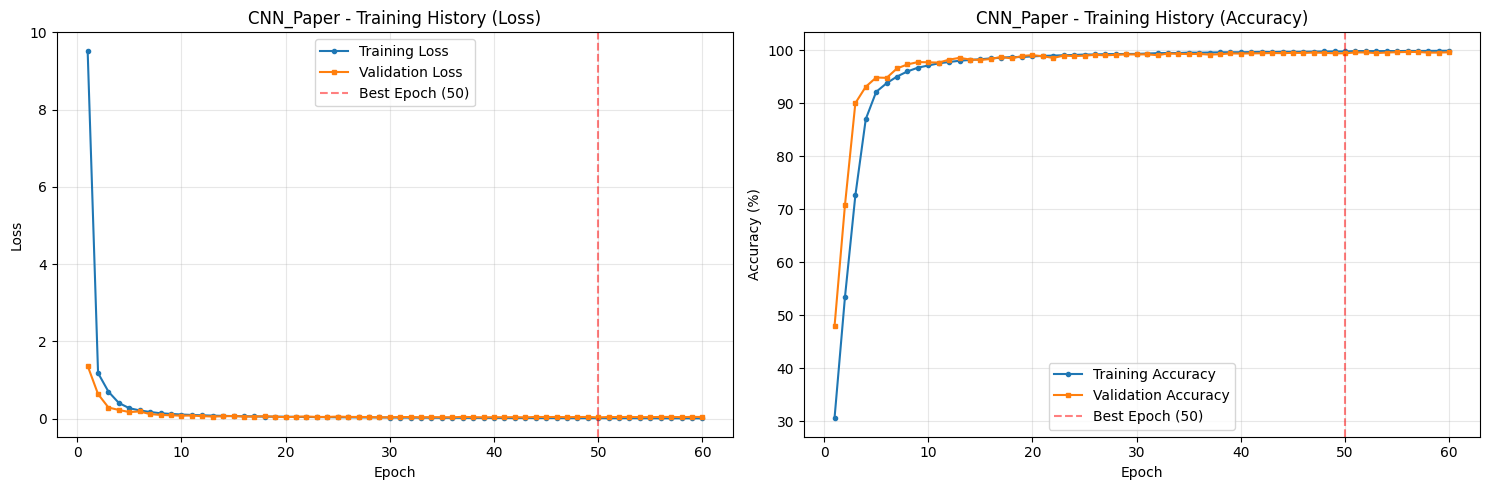


FINAL EVALUATION ON TEST SET


Testing: 100%|██████████| 172/172 [00:00<00:00, 322.08it/s]



Classification Report (CNN_Paper):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.89      0.85      0.87       556
           2       0.97      0.96      0.96      1448
           3       0.81      0.85      0.83       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.93      0.93      0.93     21892
weighted avg       0.99      0.99      0.99     21892



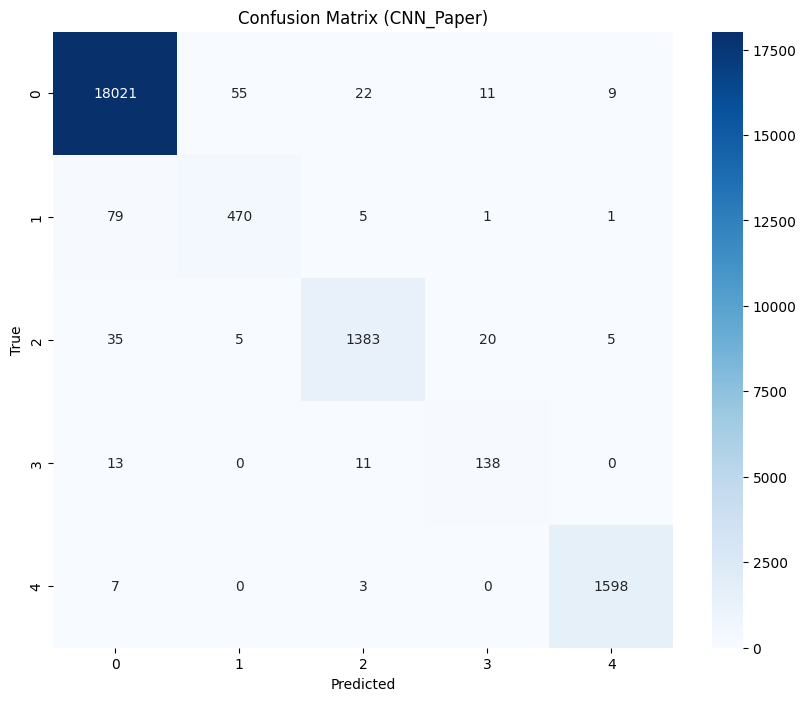

In [89]:
# Train the paper's CNN model
print("Training CNN model from paper...")
print("="*70)
trainer, model = train_paper_cnn_model(X_train, X_val, X_test, y_train, y_val, y_test)

# Hyper parameter tuning 

## Random Search with varying filter size

In [95]:
class FlexibleECG_CNN(nn.Module):

    def __init__(self, input_channels=1, num_classes=5, num_filters=32, 
                 kernel_size=5, num_res_blocks=3, dropout_rate=0.3, 
                 fc_neurons=128, sequence_length=187):
        super(FlexibleECG_CNN, self).__init__()
        
        self.num_res_blocks = num_res_blocks
        
        # Initial convolution
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, num_filters, kernel_size=kernel_size, 
                     stride=1, padding=kernel_size//2),
            nn.BatchNorm1d(num_filters),
            nn.ReLU(),
            nn.Dropout1d(dropout_rate * 0.5),  # Less dropout in early layers
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        # Build residual blocks dynamically
        self.res_blocks = nn.ModuleList()
        current_filters = num_filters
        
        for i in range(num_res_blocks):
            # Gradually increase channels
            out_filters = min(num_filters * (2 ** (i // 2)), 256)
            self.res_blocks.append(
                FlexibleResidualBlock(
                    current_filters, 
                    out_filters, 
                    kernel_size=kernel_size,
                    dropout_rate=dropout_rate
                )
            )
            current_filters = out_filters
        
        # Calculate feature size
        self._feature_size = self._get_feature_size(input_channels, sequence_length)
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(self._feature_size, fc_neurons),
            nn.BatchNorm1d(fc_neurons),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(fc_neurons, fc_neurons // 2),
            nn.BatchNorm1d(fc_neurons // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.8),
            nn.Linear(fc_neurons // 2, num_classes)
        )
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _get_feature_size(self, input_channels, sequence_length):
        """Calculate flattened feature size"""
        x = torch.randn(1, input_channels, sequence_length)
        x = self.conv1(x)
        for res_block in self.res_blocks:
            x = res_block(x)
        return x.view(1, -1).size(1)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Conv1d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, (nn.BatchNorm1d, nn.LayerNorm)):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # Input shape: (batch_size, sequence_length, input_channels)
        x = x.transpose(1, 2)  # -> (batch_size, input_channels, sequence_length)
        
        # Initial conv
        x = self.conv1(x)
        
        # Residual blocks
        for res_block in self.res_blocks:
            x = res_block(x)
        
        # Flatten and FC layers
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        
        return x


class FlexibleResidualBlock(nn.Module):
    """Flexible residual block for hyperparameter tuning"""
    def __init__(self, in_channels, out_channels, kernel_size=5, dropout_rate=0.3):
        super(FlexibleResidualBlock, self).__init__()
        
        padding = kernel_size // 2
        
        self.conv_block = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, 
                     stride=1, padding=padding),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout1d(dropout_rate),
            nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, 
                     stride=1, padding=padding),
            nn.BatchNorm1d(out_channels)
        )
        
        # Skip connection
        self.skip_connection = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1),
            nn.BatchNorm1d(out_channels)
        ) if in_channels != out_channels else nn.Identity()
        
        self.dropout = nn.Dropout1d(dropout_rate)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
    def forward(self, x):
        residual = self.skip_connection(x)
        x = self.conv_block(x)
        x = self.dropout(x + residual)
        x = self.relu(x)
        x = self.pool(x)
        return x


def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, 
                       device, num_epochs=30, patience=10):
    """
    Train and evaluate model during hyperparameter search with early stopping
    Returns best validation accuracy
    """
    model = model.to(device)
    best_val_acc = 0
    epochs_no_improve = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
        
        val_acc = 100 * correct / total
        
        # Early stopping check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"  Early stopping at epoch {epoch+1}")
            break
    
    return best_val_acc


def random_search_cnn(X_train, X_val, X_test, y_train, y_val, y_test, n_iterations=50):
    """
    Perform random search over hyperparameters with early stopping
    """
    # Define hyperparameter ranges
    param_ranges = {
        'num_filters': [16, 32, 64, 128],
        'kernel_size': [3, 5, 7, 9],
        'num_res_blocks': [2, 3, 4, 5],  # Reduced max to avoid memory issues
        'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
        'fc_neurons': [32, 64, 128, 256],
        'learning_rate': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
        'batch_size': [32, 64, 128],
        'weight_decay': [0, 1e-5, 1e-4, 1e-3],
    }
    
    results = []
    best_val_acc = 0
    best_params = None
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    sequence_length = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    
    print(f"Starting random search with {n_iterations} iterations...")
    print(f"Using device: {device}")
    print(f"Dataset info: {X_train.shape[0]} train samples, {X_val.shape[0]} val samples")
    print(f"Sequence length: {sequence_length}, Classes: {num_classes}\n")
    
    for iteration in range(n_iterations):
        # Randomly sample hyperparameters
        params = {
            key: random.choice(values) 
            for key, values in param_ranges.items()
        }
        
        print(f"\n{'='*70}")
        print(f"Iteration {iteration+1}/{n_iterations}")
        print(f"Parameters: {params}")
        print(f"{'='*70}")
        
        try:
            # Create model
            model = FlexibleECG_CNN(
                input_channels=1,
                num_classes=num_classes,
                num_filters=params['num_filters'],
                kernel_size=params['kernel_size'],
                num_res_blocks=params['num_res_blocks'],
                dropout_rate=params['dropout_rate'],
                fc_neurons=params['fc_neurons'],
                sequence_length=sequence_length
            )
            
            # Create data loaders
            train_loader = DataLoader(
                ECGDataset(X_train, y_train),
                batch_size=params['batch_size'],
                shuffle=True,
                num_workers=0
            )
            val_loader = DataLoader(
                ECGDataset(X_val, y_val),
                batch_size=params['batch_size'],
                num_workers=0
            )
            
            # Setup training
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.AdamW(
                model.parameters(),
                lr=params['learning_rate'],
                weight_decay=params['weight_decay']
            )
            
            # Train with early stopping
            val_acc = train_and_evaluate(
                model, train_loader, val_loader,
                criterion, optimizer, device,
                num_epochs=30,
                patience=10
            )
            
            # Store results
            result = {
                'params': params,
                'val_accuracy': val_acc,
                'iteration': iteration
            }
            results.append(result)
            
            print(f"  ✓ Validation Accuracy: {val_acc:.2f}%")
            
            # Update best
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = params.copy()
                print(f"  🎯 New best validation accuracy: {val_acc:.2f}%")
                
        except Exception as e:
            print(f"  ✗ Error in iteration {iteration}: {str(e)}")
            import traceback
            traceback.print_exc()
            continue
    
    # Sort results by accuracy
    results_sorted = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)
    
    print(f"\n{'='*70}")
    print("RANDOM SEARCH COMPLETE")
    print(f"{'='*70}")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"\nBest parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    print(f"\n{'='*70}")
    print(f"Top 5 configurations:")
    print(f"{'='*70}")
    for i, result in enumerate(results_sorted[:5], 1):
        print(f"\n{i}. Accuracy: {result['val_accuracy']:.2f}%")
        print(f"   Parameters:")
        for key, value in result['params'].items():
            print(f"     {key}: {value}")
    
    return results, best_params


# Run the random search
results, best_params = random_search_cnn(
    X_train, X_val, X_test, y_train, y_val, y_test,
    n_iterations=50
)

Starting random search with 50 iterations...
Using device: cuda
Dataset info: 117401 train samples, 13045 val samples
Sequence length: 187, Classes: 5


Iteration 1/50
Parameters: {'num_filters': 32, 'kernel_size': 5, 'num_res_blocks': 5, 'dropout_rate': 0.3, 'fc_neurons': 128, 'learning_rate': 1e-05, 'batch_size': 32, 'weight_decay': 0}
  ✓ Validation Accuracy: 79.20%
  🎯 New best validation accuracy: 79.20%

Iteration 2/50
Parameters: {'num_filters': 64, 'kernel_size': 5, 'num_res_blocks': 3, 'dropout_rate': 0.3, 'fc_neurons': 32, 'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 0.0001}
  ✓ Validation Accuracy: 98.90%
  🎯 New best validation accuracy: 98.90%

Iteration 3/50
Parameters: {'num_filters': 128, 'kernel_size': 7, 'num_res_blocks': 3, 'dropout_rate': 0.2, 'fc_neurons': 64, 'learning_rate': 0.0001, 'batch_size': 128, 'weight_decay': 0}
  ✓ Validation Accuracy: 99.31%
  🎯 New best validation accuracy: 99.31%

Iteration 4/50
Parameters: {'num_filters': 128, 'kernel_s

Training model with best configuration...
Parameters: {'num_filters': 128, 'kernel_size': 5, 'num_res_blocks': 2, 'dropout_rate': 0.2, 'fc_neurons': 256, 'learning_rate': 0.001, 'batch_size': 64, 'weight_decay': 0}


Starting training for FlexibleECG_CNN_Best...
Early stopping enabled with patience=10


Training: 100%|██████████| 1835/1835 [00:13<00:00, 134.66it/s]



Epoch [1/50]
Train Loss: 0.2452, Train Acc: 91.39%
Val Loss: 0.0941, Val Acc: 96.77%
Learning Rate: 0.001200
✓ New best model saved! (Val Loss: 0.0941)
Validation loss improved to 0.0941


Training: 100%|██████████| 1835/1835 [00:13<00:00, 139.10it/s]



Epoch [2/50]
Train Loss: 0.1222, Train Acc: 95.70%
Val Loss: 0.0658, Val Acc: 97.73%
Learning Rate: 0.001400
✓ New best model saved! (Val Loss: 0.0658)
Validation loss improved to 0.0658


Training: 100%|██████████| 1835/1835 [00:15<00:00, 121.15it/s]



Epoch [3/50]
Train Loss: 0.0912, Train Acc: 96.86%
Val Loss: 0.0464, Val Acc: 98.46%
Learning Rate: 0.001600
✓ New best model saved! (Val Loss: 0.0464)
Validation loss improved to 0.0464


Training: 100%|██████████| 1835/1835 [00:15<00:00, 115.05it/s]



Epoch [4/50]
Train Loss: 0.0769, Train Acc: 97.32%
Val Loss: 0.0483, Val Acc: 98.46%
Learning Rate: 0.001800
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 113.19it/s]



Epoch [5/50]
Train Loss: 0.0652, Train Acc: 97.77%
Val Loss: 0.0424, Val Acc: 98.58%
Learning Rate: 0.002000
✓ New best model saved! (Val Loss: 0.0424)
Validation loss improved to 0.0424


Training: 100%|██████████| 1835/1835 [00:16<00:00, 112.96it/s]



Epoch [6/50]
Train Loss: 0.0575, Train Acc: 98.03%
Val Loss: 0.0399, Val Acc: 98.67%
Learning Rate: 0.001999
✓ New best model saved! (Val Loss: 0.0399)
Validation loss improved to 0.0399


Training: 100%|██████████| 1835/1835 [00:15<00:00, 116.94it/s]



Epoch [7/50]
Train Loss: 0.0516, Train Acc: 98.20%
Val Loss: 0.0294, Val Acc: 99.10%
Learning Rate: 0.001995
✓ New best model saved! (Val Loss: 0.0294)
Validation loss improved to 0.0294


Training: 100%|██████████| 1835/1835 [00:15<00:00, 121.78it/s]



Epoch [8/50]
Train Loss: 0.0447, Train Acc: 98.46%
Val Loss: 0.0357, Val Acc: 99.00%
Learning Rate: 0.001989
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 122.20it/s]



Epoch [9/50]
Train Loss: 0.0411, Train Acc: 98.61%
Val Loss: 0.0239, Val Acc: 99.37%
Learning Rate: 0.001981
✓ New best model saved! (Val Loss: 0.0239)
Validation loss improved to 0.0239


Training: 100%|██████████| 1835/1835 [00:16<00:00, 111.57it/s]



Epoch [10/50]
Train Loss: 0.0357, Train Acc: 98.77%
Val Loss: 0.0213, Val Acc: 99.39%
Learning Rate: 0.001970
✓ New best model saved! (Val Loss: 0.0213)
Validation loss improved to 0.0213


Training: 100%|██████████| 1835/1835 [00:15<00:00, 116.35it/s]



Epoch [11/50]
Train Loss: 0.0326, Train Acc: 98.85%
Val Loss: 0.0275, Val Acc: 99.12%
Learning Rate: 0.001957
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 117.61it/s]



Epoch [12/50]
Train Loss: 0.0307, Train Acc: 98.96%
Val Loss: 0.0240, Val Acc: 99.22%
Learning Rate: 0.001941
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 109.84it/s]



Epoch [13/50]
Train Loss: 0.0279, Train Acc: 99.04%
Val Loss: 0.0267, Val Acc: 99.23%
Learning Rate: 0.001924
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:17<00:00, 107.22it/s]



Epoch [14/50]
Train Loss: 0.0266, Train Acc: 99.10%
Val Loss: 0.0189, Val Acc: 99.49%
Learning Rate: 0.001905
✓ New best model saved! (Val Loss: 0.0189)
Validation loss improved to 0.0189


Training: 100%|██████████| 1835/1835 [00:16<00:00, 110.70it/s]



Epoch [15/50]
Train Loss: 0.0245, Train Acc: 99.15%
Val Loss: 0.0182, Val Acc: 99.50%
Learning Rate: 0.001883
✓ New best model saved! (Val Loss: 0.0182)
Validation loss improved to 0.0182


Training: 100%|██████████| 1835/1835 [00:15<00:00, 115.18it/s]



Epoch [16/50]
Train Loss: 0.0222, Train Acc: 99.25%
Val Loss: 0.0209, Val Acc: 99.43%
Learning Rate: 0.001860
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 119.20it/s]



Epoch [17/50]
Train Loss: 0.0215, Train Acc: 99.27%
Val Loss: 0.0202, Val Acc: 99.48%
Learning Rate: 0.001835
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 122.04it/s]



Epoch [18/50]
Train Loss: 0.0208, Train Acc: 99.30%
Val Loss: 0.0160, Val Acc: 99.58%
Learning Rate: 0.001808
✓ New best model saved! (Val Loss: 0.0160)
Validation loss improved to 0.0160


Training: 100%|██████████| 1835/1835 [00:15<00:00, 122.11it/s]



Epoch [19/50]
Train Loss: 0.0198, Train Acc: 99.31%
Val Loss: 0.0257, Val Acc: 99.35%
Learning Rate: 0.001780
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 112.87it/s]



Epoch [20/50]
Train Loss: 0.0181, Train Acc: 99.38%
Val Loss: 0.0197, Val Acc: 99.49%
Learning Rate: 0.001750
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 116.20it/s]



Epoch [21/50]
Train Loss: 0.0189, Train Acc: 99.38%
Val Loss: 0.0214, Val Acc: 99.41%
Learning Rate: 0.001719
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 113.33it/s]



Epoch [22/50]
Train Loss: 0.0161, Train Acc: 99.48%
Val Loss: 0.0180, Val Acc: 99.54%
Learning Rate: 0.001687
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 115.97it/s]



Epoch [23/50]
Train Loss: 0.0153, Train Acc: 99.49%
Val Loss: 0.0198, Val Acc: 99.55%
Learning Rate: 0.001655
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 117.05it/s]



Epoch [24/50]
Train Loss: 0.0158, Train Acc: 99.47%
Val Loss: 0.0166, Val Acc: 99.58%
Learning Rate: 0.001621
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 117.90it/s]



Epoch [25/50]
Train Loss: 0.0135, Train Acc: 99.52%
Val Loss: 0.0211, Val Acc: 99.57%
Learning Rate: 0.001587
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 1835/1835 [00:15<00:00, 117.45it/s]



Epoch [26/50]
Train Loss: 0.0136, Train Acc: 99.53%
Val Loss: 0.0175, Val Acc: 99.60%
Learning Rate: 0.001552
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 110.76it/s]



Epoch [27/50]
Train Loss: 0.0130, Train Acc: 99.55%
Val Loss: 0.0179, Val Acc: 99.54%
Learning Rate: 0.001517
EarlyStopping counter: 9 out of 10


Training: 100%|██████████| 1835/1835 [00:16<00:00, 114.50it/s]



Epoch [28/50]
Train Loss: 0.0123, Train Acc: 99.61%
Val Loss: 0.0172, Val Acc: 99.55%
Learning Rate: 0.001483
EarlyStopping counter: 10 out of 10

Early stopping triggered! No improvement for 10 epochs.
Best validation loss: 0.0160 at epoch 18

Training stopped early at epoch 28
Best validation loss: 0.0160
Best epoch: 18


Training Summary for FlexibleECG_CNN_Best
Total epochs trained: 28
Best validation loss: 0.0160
Final train accuracy: 99.61%
Final validation accuracy: 99.55%



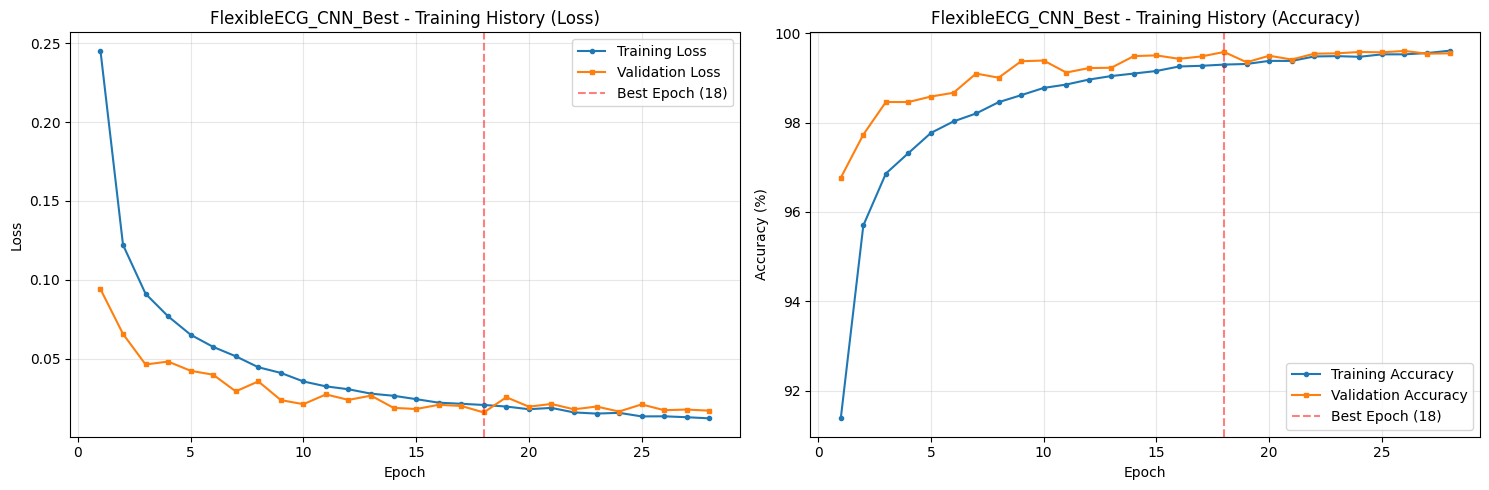


EVALUATING ON TEST SET



Testing: 100%|██████████| 343/343 [00:01<00:00, 340.65it/s]



Classification Report (FlexibleECG_CNN_Best):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.85      0.85      0.85       556
           2       0.98      0.96      0.97      1448
           3       0.72      0.89      0.80       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.91      0.94      0.92     21892
weighted avg       0.99      0.99      0.99     21892



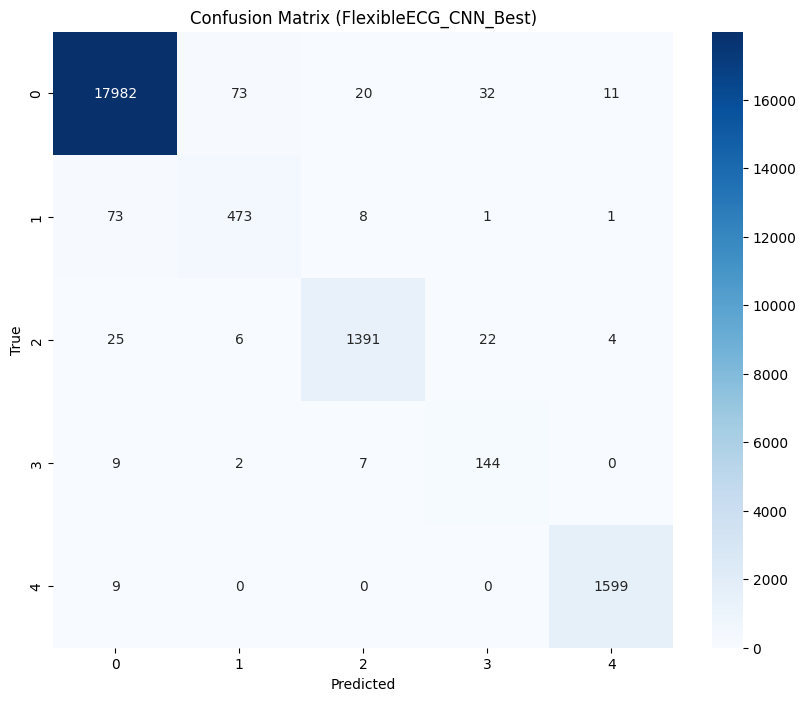


Model and results saved to: models\FlexibleECG_CNN_Best_20251103_081200


In [102]:
best_params = {
    'num_filters': 128,
    'kernel_size': 5,
    'num_res_blocks': 2,
    'dropout_rate': 0.2,
    'fc_neurons': 256,
    'learning_rate': 0.001,
    'batch_size': 64,
    'weight_decay': 0
}

print("Training model with best configuration...")
print(f"Parameters: {best_params}\n")

# Create the best model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sequence_length = X_train.shape[1]
num_classes = len(np.unique(y_train))

best_model = FlexibleECG_CNN(
    input_channels=1,
    num_classes=num_classes,
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    num_res_blocks=best_params['num_res_blocks'],
    dropout_rate=best_params['dropout_rate'],
    fc_neurons=best_params['fc_neurons'],
    sequence_length=sequence_length
)

# Create data loaders
train_loader = DataLoader(
    ECGDataset(X_train, y_train),
    batch_size=best_params['batch_size'],
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    ECGDataset(X_val, y_val),
    batch_size=best_params['batch_size'],
    num_workers=0
)

test_loader = DataLoader(
    ECGDataset(X_test, y_test),
    batch_size=best_params['batch_size'],
    num_workers=0
)

# Setup training configuration
config = {
    'initial_lr': best_params['learning_rate'],
    'max_lr': best_params['learning_rate'] * 2,
    'warmup_epochs': 5,
    'num_epochs': 50,
    'weight_decay': best_params['weight_decay']
}

criterion = nn.CrossEntropyLoss()

# Initialize the trainer
trainer = ModelTrainer(
    model=best_model,
    model_name='FlexibleECG_CNN_Best',
    device=device,
    criterion=criterion,
    config=config,
    early_stopping_patience=10
)

# Train the model
trainer.train(train_loader, val_loader, num_epochs=config['num_epochs'])

# Plot training history
trainer.plot_training_history()

# Evaluate on test set
print("\n" + "="*70)
print("EVALUATING ON TEST SET")
print("="*70 + "\n")
trainer.evaluate(test_loader)

# Save detailed results
print(f"\nModel and results saved to: {trainer.save_dir}")

## Random Search Attempt 2

In [113]:
class FlexibleECG_CNN(nn.Module):
    def __init__(self, input_channels=1, num_classes=5, num_filters=32, 
                 kernel_size=5, num_res_blocks=3, dropout_rate=0.3, 
                 fc_neurons=128, sequence_length=187, 
                 constant_filters=False): 
        super(FlexibleECG_CNN, self).__init__()
        
        self.num_res_blocks = num_res_blocks
        
        # Initial convolution
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, num_filters, kernel_size=kernel_size, 
                     stride=1, padding=kernel_size//2),
            nn.BatchNorm1d(num_filters),
            nn.ReLU(),
            nn.Dropout1d(dropout_rate * 0.5),  # Less dropout in early layers
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        # Build residual blocks dynamically
        self.res_blocks = nn.ModuleList()
        current_filters = num_filters
        
        for i in range(num_res_blocks):
            if constant_filters:
                out_filters = num_filters 
            else:
                out_filters = min(num_filters * (2 ** (i // 2)), 256)  # Scale
            self.res_blocks.append(
                FlexibleResidualBlock(
                    current_filters, 
                    out_filters, 
                    kernel_size=kernel_size,
                    dropout_rate=dropout_rate
                )
            )
            current_filters = out_filters
        
        # Calculate feature size
        self._feature_size = self._get_feature_size(input_channels, sequence_length)
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(self._feature_size, fc_neurons),
            nn.BatchNorm1d(fc_neurons),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(fc_neurons, fc_neurons // 2),
            nn.BatchNorm1d(fc_neurons // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.8),
            nn.Linear(fc_neurons // 2, num_classes)
        )
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _get_feature_size(self, input_channels, sequence_length):
        """Calculate flattened feature size"""
        x = torch.randn(1, input_channels, sequence_length)
        x = self.conv1(x)
        for res_block in self.res_blocks:
            x = res_block(x)
        return x.view(1, -1).size(1)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Conv1d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, (nn.BatchNorm1d, nn.LayerNorm)):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # Input shape: (batch_size, sequence_length, input_channels)
        x = x.transpose(1, 2)  # -> (batch_size, input_channels, sequence_length)
        
        # Initial conv
        x = self.conv1(x)
        
        # Residual blocks
        for res_block in self.res_blocks:
            x = res_block(x)
        
        # Flatten and FC layers
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        
        return x


class FlexibleResidualBlock(nn.Module):
    """Flexible residual block for hyperparameter tuning"""
    def __init__(self, in_channels, out_channels, kernel_size=5, dropout_rate=0.3):
        super(FlexibleResidualBlock, self).__init__()
        
        padding = kernel_size // 2
        
        self.conv_block = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, 
                     stride=1, padding=padding),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout1d(dropout_rate),
            nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, 
                     stride=1, padding=padding),
            nn.BatchNorm1d(out_channels)
        )
        
        # Skip connection
        self.skip_connection = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1),
            nn.BatchNorm1d(out_channels)
        ) if in_channels != out_channels else nn.Identity()
        
        self.dropout = nn.Dropout1d(dropout_rate)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
    def forward(self, x):
        residual = self.skip_connection(x)
        x = self.conv_block(x)
        x = self.dropout(x + residual)
        x = self.relu(x)
        x = self.pool(x)
        return x


def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, 
                       device, num_epochs=30, patience=10):
    """
    Train and evaluate model during hyperparameter search with early stopping
    Returns best validation accuracy
    """
    model = model.to(device)
    best_val_acc = 0
    epochs_no_improve = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
        
        val_acc = 100 * correct / total
        
        # Early stopping check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"  Early stopping at epoch {epoch+1}")
            break
    
    return best_val_acc


def random_search_cnn(X_train, X_val, X_test, y_train, y_val, y_test, n_iterations=50):
    """
    Perform random search over hyperparameters with early stopping
    """
    # Define hyperparameter ranges
    param_ranges = {
        'num_filters': [16, 32, 64, 128],
        'kernel_size': [3, 5, 7, 9],
        'num_res_blocks': [2, 3, 4, 5],  # Reduced max to avoid memory issues
        'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
        'fc_neurons': [32, 64, 128, 256],
        'learning_rate': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
        'batch_size': [32, 64, 128],
        'weight_decay': [0, 1e-5, 1e-4, 1e-3],
    }
    
    results = []
    best_val_acc = 0
    best_params = None
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    sequence_length = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    
    print(f"Starting random search with {n_iterations} iterations...")
    print(f"Using device: {device}")
    print(f"Dataset info: {X_train.shape[0]} train samples, {X_val.shape[0]} val samples")
    print(f"Sequence length: {sequence_length}, Classes: {num_classes}\n")
    
    for iteration in range(n_iterations):
        # Randomly sample hyperparameters
        params = {
            key: random.choice(values) 
            for key, values in param_ranges.items()
        }
        
        print(f"\n{'='*70}")
        print(f"Iteration {iteration+1}/{n_iterations}")
        print(f"Parameters: {params}")
        print(f"{'='*70}")
        
        try:
            # Create model
            model = FlexibleECG_CNN(
                input_channels=1,
                num_classes=num_classes,
                num_filters=params['num_filters'],
                kernel_size=params['kernel_size'],
                num_res_blocks=params['num_res_blocks'],
                dropout_rate=params['dropout_rate'],
                fc_neurons=params['fc_neurons'],
                sequence_length=sequence_length
            )
            
            # Create data loaders
            train_loader = DataLoader(
                ECGDataset(X_train, y_train),
                batch_size=params['batch_size'],
                shuffle=True,
                num_workers=0
            )
            val_loader = DataLoader(
                ECGDataset(X_val, y_val),
                batch_size=params['batch_size'],
                num_workers=0
            )
            
            # Setup training
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.AdamW(
                model.parameters(),
                lr=params['learning_rate'],
                weight_decay=params['weight_decay']
            )
            
            # Train with early stopping
            val_acc = train_and_evaluate(
                model, train_loader, val_loader,
                criterion, optimizer, device,
                num_epochs=30,
                patience=10
            )
            
            # Store results
            result = {
                'params': params,
                'val_accuracy': val_acc,
                'iteration': iteration
            }
            results.append(result)
            
            print(f"  ✓ Validation Accuracy: {val_acc:.2f}%")
            
            # Update best
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = params.copy()
                print(f"  🎯 New best validation accuracy: {val_acc:.2f}%")
                
        except Exception as e:
            print(f"  ✗ Error in iteration {iteration}: {str(e)}")
            import traceback
            traceback.print_exc()
            continue
    
    # Sort results by accuracy
    results_sorted = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)
    
    print(f"\n{'='*70}")
    print("RANDOM SEARCH COMPLETE")
    print(f"{'='*70}")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"\nBest parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    print(f"\n{'='*70}")
    print(f"Top 5 configurations:")
    print(f"{'='*70}")
    for i, result in enumerate(results_sorted[:5], 1):
        print(f"\n{i}. Accuracy: {result['val_accuracy']:.2f}%")
        print(f"   Parameters:")
        for key, value in result['params'].items():
            print(f"     {key}: {value}")
    
    return results, best_params

In [ ]:
# Run the random search
results, best_params = random_search_cnn(
    X_train, X_val, X_test, y_train, y_val, y_test,
    n_iterations=50
)

Starting random search with 50 iterations...
Using device: cuda
Dataset info: 117401 train samples, 13045 val samples
Sequence length: 187, Classes: 5


Iteration 1/50
Parameters: {'num_filters': 64, 'kernel_size': 5, 'num_res_blocks': 4, 'dropout_rate': 0.5, 'fc_neurons': 128, 'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 0.001}
  ✓ Validation Accuracy: 97.55%
  🎯 New best validation accuracy: 97.55%

Iteration 2/50
Parameters: {'num_filters': 128, 'kernel_size': 7, 'num_res_blocks': 2, 'dropout_rate': 0.5, 'fc_neurons': 128, 'learning_rate': 0.0005, 'batch_size': 128, 'weight_decay': 0.0001}
  ✓ Validation Accuracy: 98.77%
  🎯 New best validation accuracy: 98.77%

Iteration 3/50
Parameters: {'num_filters': 128, 'kernel_size': 7, 'num_res_blocks': 3, 'dropout_rate': 0.5, 'fc_neurons': 128, 'learning_rate': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}
  ✓ Validation Accuracy: 97.25%

Iteration 4/50
Parameters: {'num_filters': 32, 'kernel_size': 9, 'num_res_blocks': 3, 

Training model with best configuration (99.65% validation accuracy)...
Parameters: {'num_filters': 128, 'kernel_size': 3, 'num_res_blocks': 5, 'dropout_rate': 0.1, 'fc_neurons': 128, 'learning_rate': 0.001, 'batch_size': 128, 'weight_decay': 1e-05}


Starting training for FlexibleECG_CNN_Best_99.65...
Early stopping enabled with patience=15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.35it/s]



Epoch [1/50]
Train Loss: 0.2458, Train Acc: 91.34%
Val Loss: 0.0819, Val Acc: 97.29%
Learning Rate: 0.001200
✓ New best model saved! (Val Loss: 0.0819)
Validation loss improved to 0.0819


Training: 100%|██████████| 918/918 [00:12<00:00, 74.44it/s]



Epoch [2/50]
Train Loss: 0.1020, Train Acc: 96.51%
Val Loss: 0.0611, Val Acc: 98.11%
Learning Rate: 0.001400
✓ New best model saved! (Val Loss: 0.0611)
Validation loss improved to 0.0611


Training: 100%|██████████| 918/918 [00:12<00:00, 74.05it/s]



Epoch [3/50]
Train Loss: 0.0760, Train Acc: 97.41%
Val Loss: 0.0472, Val Acc: 98.40%
Learning Rate: 0.001600
✓ New best model saved! (Val Loss: 0.0472)
Validation loss improved to 0.0472


Training: 100%|██████████| 918/918 [00:12<00:00, 73.88it/s]



Epoch [4/50]
Train Loss: 0.0609, Train Acc: 97.90%
Val Loss: 0.0430, Val Acc: 98.72%
Learning Rate: 0.001800
✓ New best model saved! (Val Loss: 0.0430)
Validation loss improved to 0.0430


Training: 100%|██████████| 918/918 [00:12<00:00, 72.82it/s]



Epoch [5/50]
Train Loss: 0.0520, Train Acc: 98.20%
Val Loss: 0.0382, Val Acc: 98.77%
Learning Rate: 0.002000
✓ New best model saved! (Val Loss: 0.0382)
Validation loss improved to 0.0382


Training: 100%|██████████| 918/918 [00:12<00:00, 73.26it/s]



Epoch [6/50]
Train Loss: 0.0476, Train Acc: 98.37%
Val Loss: 0.0380, Val Acc: 98.76%
Learning Rate: 0.001999
✓ New best model saved! (Val Loss: 0.0380)
Validation loss improved to 0.0380


Training: 100%|██████████| 918/918 [00:12<00:00, 72.27it/s]



Epoch [7/50]
Train Loss: 0.0415, Train Acc: 98.61%
Val Loss: 0.0356, Val Acc: 98.82%
Learning Rate: 0.001995
✓ New best model saved! (Val Loss: 0.0356)
Validation loss improved to 0.0356


Training: 100%|██████████| 918/918 [00:12<00:00, 73.86it/s]



Epoch [8/50]
Train Loss: 0.0369, Train Acc: 98.78%
Val Loss: 0.0289, Val Acc: 99.08%
Learning Rate: 0.001989
✓ New best model saved! (Val Loss: 0.0289)
Validation loss improved to 0.0289


Training: 100%|██████████| 918/918 [00:12<00:00, 75.80it/s]



Epoch [9/50]
Train Loss: 0.0311, Train Acc: 98.95%
Val Loss: 0.0264, Val Acc: 99.29%
Learning Rate: 0.001981
✓ New best model saved! (Val Loss: 0.0264)
Validation loss improved to 0.0264


Training: 100%|██████████| 918/918 [00:12<00:00, 75.84it/s]



Epoch [10/50]
Train Loss: 0.0298, Train Acc: 99.00%
Val Loss: 0.0221, Val Acc: 99.31%
Learning Rate: 0.001970
✓ New best model saved! (Val Loss: 0.0221)
Validation loss improved to 0.0221


Training: 100%|██████████| 918/918 [00:12<00:00, 75.71it/s]



Epoch [11/50]
Train Loss: 0.0266, Train Acc: 99.13%
Val Loss: 0.0213, Val Acc: 99.36%
Learning Rate: 0.001957
✓ New best model saved! (Val Loss: 0.0213)
Validation loss improved to 0.0213


Training: 100%|██████████| 918/918 [00:12<00:00, 74.92it/s]



Epoch [12/50]
Train Loss: 0.0233, Train Acc: 99.22%
Val Loss: 0.0283, Val Acc: 99.17%
Learning Rate: 0.001941
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.47it/s]



Epoch [13/50]
Train Loss: 0.0217, Train Acc: 99.27%
Val Loss: 0.0212, Val Acc: 99.33%
Learning Rate: 0.001924
✓ New best model saved! (Val Loss: 0.0212)
Validation loss improved to 0.0212


Training: 100%|██████████| 918/918 [00:12<00:00, 75.72it/s]



Epoch [14/50]
Train Loss: 0.0198, Train Acc: 99.33%
Val Loss: 0.0212, Val Acc: 99.39%
Learning Rate: 0.001905
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.63it/s]



Epoch [15/50]
Train Loss: 0.0195, Train Acc: 99.37%
Val Loss: 0.0177, Val Acc: 99.57%
Learning Rate: 0.001883
✓ New best model saved! (Val Loss: 0.0177)
Validation loss improved to 0.0177


Training: 100%|██████████| 918/918 [00:12<00:00, 75.77it/s]



Epoch [16/50]
Train Loss: 0.0168, Train Acc: 99.44%
Val Loss: 0.0270, Val Acc: 99.26%
Learning Rate: 0.001860
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.68it/s]



Epoch [17/50]
Train Loss: 0.0165, Train Acc: 99.46%
Val Loss: 0.0200, Val Acc: 99.48%
Learning Rate: 0.001835
EarlyStopping counter: 2 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.76it/s]



Epoch [18/50]
Train Loss: 0.0137, Train Acc: 99.54%
Val Loss: 0.0198, Val Acc: 99.52%
Learning Rate: 0.001808
EarlyStopping counter: 3 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.79it/s]



Epoch [19/50]
Train Loss: 0.0142, Train Acc: 99.55%
Val Loss: 0.0173, Val Acc: 99.62%
Learning Rate: 0.001780
✓ New best model saved! (Val Loss: 0.0173)
Validation loss improved to 0.0173


Training: 100%|██████████| 918/918 [00:12<00:00, 75.64it/s]



Epoch [20/50]
Train Loss: 0.0122, Train Acc: 99.60%
Val Loss: 0.0203, Val Acc: 99.52%
Learning Rate: 0.001750
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.75it/s]



Epoch [21/50]
Train Loss: 0.0113, Train Acc: 99.62%
Val Loss: 0.0185, Val Acc: 99.55%
Learning Rate: 0.001719
EarlyStopping counter: 2 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 72.95it/s]



Epoch [22/50]
Train Loss: 0.0117, Train Acc: 99.62%
Val Loss: 0.0207, Val Acc: 99.52%
Learning Rate: 0.001687
EarlyStopping counter: 3 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.16it/s]



Epoch [23/50]
Train Loss: 0.0104, Train Acc: 99.66%
Val Loss: 0.0214, Val Acc: 99.58%
Learning Rate: 0.001655
EarlyStopping counter: 4 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.55it/s]



Epoch [24/50]
Train Loss: 0.0096, Train Acc: 99.67%
Val Loss: 0.0179, Val Acc: 99.61%
Learning Rate: 0.001621
EarlyStopping counter: 5 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 73.58it/s]



Epoch [25/50]
Train Loss: 0.0086, Train Acc: 99.72%
Val Loss: 0.0204, Val Acc: 99.50%
Learning Rate: 0.001587
EarlyStopping counter: 6 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.15it/s]



Epoch [26/50]
Train Loss: 0.0076, Train Acc: 99.75%
Val Loss: 0.0185, Val Acc: 99.63%
Learning Rate: 0.001552
EarlyStopping counter: 7 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.40it/s]



Epoch [27/50]
Train Loss: 0.0080, Train Acc: 99.76%
Val Loss: 0.0188, Val Acc: 99.65%
Learning Rate: 0.001517
EarlyStopping counter: 8 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.29it/s]



Epoch [28/50]
Train Loss: 0.0083, Train Acc: 99.74%
Val Loss: 0.0182, Val Acc: 99.60%
Learning Rate: 0.001483
EarlyStopping counter: 9 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.84it/s]



Epoch [29/50]
Train Loss: 0.0066, Train Acc: 99.77%
Val Loss: 0.0171, Val Acc: 99.65%
Learning Rate: 0.001448
✓ New best model saved! (Val Loss: 0.0171)
Validation loss improved to 0.0171


Training: 100%|██████████| 918/918 [00:12<00:00, 75.25it/s]



Epoch [30/50]
Train Loss: 0.0064, Train Acc: 99.79%
Val Loss: 0.0181, Val Acc: 99.65%
Learning Rate: 0.001413
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.39it/s]



Epoch [31/50]
Train Loss: 0.0060, Train Acc: 99.81%
Val Loss: 0.0238, Val Acc: 99.48%
Learning Rate: 0.001379
EarlyStopping counter: 2 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.49it/s]



Epoch [32/50]
Train Loss: 0.0060, Train Acc: 99.80%
Val Loss: 0.0148, Val Acc: 99.67%
Learning Rate: 0.001345
✓ New best model saved! (Val Loss: 0.0148)
Validation loss improved to 0.0148


Training: 100%|██████████| 918/918 [00:12<00:00, 74.22it/s]



Epoch [33/50]
Train Loss: 0.0055, Train Acc: 99.83%
Val Loss: 0.0179, Val Acc: 99.66%
Learning Rate: 0.001313
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.60it/s]



Epoch [34/50]
Train Loss: 0.0047, Train Acc: 99.85%
Val Loss: 0.0147, Val Acc: 99.74%
Learning Rate: 0.001281
✓ New best model saved! (Val Loss: 0.0147)
Validation loss improved to 0.0147


Training: 100%|██████████| 918/918 [00:12<00:00, 75.22it/s]



Epoch [35/50]
Train Loss: 0.0054, Train Acc: 99.82%
Val Loss: 0.0185, Val Acc: 99.67%
Learning Rate: 0.001250
EarlyStopping counter: 1 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.40it/s]



Epoch [36/50]
Train Loss: 0.0042, Train Acc: 99.87%
Val Loss: 0.0183, Val Acc: 99.70%
Learning Rate: 0.001220
EarlyStopping counter: 2 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.45it/s]



Epoch [37/50]
Train Loss: 0.0039, Train Acc: 99.87%
Val Loss: 0.0182, Val Acc: 99.65%
Learning Rate: 0.001192
EarlyStopping counter: 3 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.28it/s]



Epoch [38/50]
Train Loss: 0.0049, Train Acc: 99.84%
Val Loss: 0.0163, Val Acc: 99.78%
Learning Rate: 0.001165
EarlyStopping counter: 4 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.50it/s]



Epoch [39/50]
Train Loss: 0.0036, Train Acc: 99.89%
Val Loss: 0.0174, Val Acc: 99.67%
Learning Rate: 0.001140
EarlyStopping counter: 5 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.42it/s]



Epoch [40/50]
Train Loss: 0.0038, Train Acc: 99.89%
Val Loss: 0.0182, Val Acc: 99.69%
Learning Rate: 0.001117
EarlyStopping counter: 6 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.38it/s]



Epoch [41/50]
Train Loss: 0.0039, Train Acc: 99.87%
Val Loss: 0.0164, Val Acc: 99.76%
Learning Rate: 0.001095
EarlyStopping counter: 7 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.47it/s]



Epoch [42/50]
Train Loss: 0.0033, Train Acc: 99.88%
Val Loss: 0.0180, Val Acc: 99.73%
Learning Rate: 0.001076
EarlyStopping counter: 8 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.60it/s]



Epoch [43/50]
Train Loss: 0.0028, Train Acc: 99.90%
Val Loss: 0.0189, Val Acc: 99.72%
Learning Rate: 0.001059
EarlyStopping counter: 9 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.49it/s]



Epoch [44/50]
Train Loss: 0.0034, Train Acc: 99.89%
Val Loss: 0.0204, Val Acc: 99.67%
Learning Rate: 0.001043
EarlyStopping counter: 10 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 75.47it/s]



Epoch [45/50]
Train Loss: 0.0030, Train Acc: 99.90%
Val Loss: 0.0186, Val Acc: 99.72%
Learning Rate: 0.001030
EarlyStopping counter: 11 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.63it/s]



Epoch [46/50]
Train Loss: 0.0026, Train Acc: 99.91%
Val Loss: 0.0175, Val Acc: 99.75%
Learning Rate: 0.001019
EarlyStopping counter: 12 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 73.29it/s]



Epoch [47/50]
Train Loss: 0.0032, Train Acc: 99.90%
Val Loss: 0.0184, Val Acc: 99.70%
Learning Rate: 0.001011
EarlyStopping counter: 13 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 73.30it/s]



Epoch [48/50]
Train Loss: 0.0024, Train Acc: 99.92%
Val Loss: 0.0193, Val Acc: 99.69%
Learning Rate: 0.001005
EarlyStopping counter: 14 out of 15


Training: 100%|██████████| 918/918 [00:12<00:00, 74.81it/s]



Epoch [49/50]
Train Loss: 0.0022, Train Acc: 99.93%
Val Loss: 0.0184, Val Acc: 99.75%
Learning Rate: 0.001001
EarlyStopping counter: 15 out of 15

Early stopping triggered! No improvement for 15 epochs.
Best validation loss: 0.0147 at epoch 34

Training stopped early at epoch 49
Best validation loss: 0.0147
Best epoch: 34


Training Summary for FlexibleECG_CNN_Best_99.65
Total epochs trained: 49
Best validation loss: 0.0147
Final train accuracy: 99.93%
Final validation accuracy: 99.75%



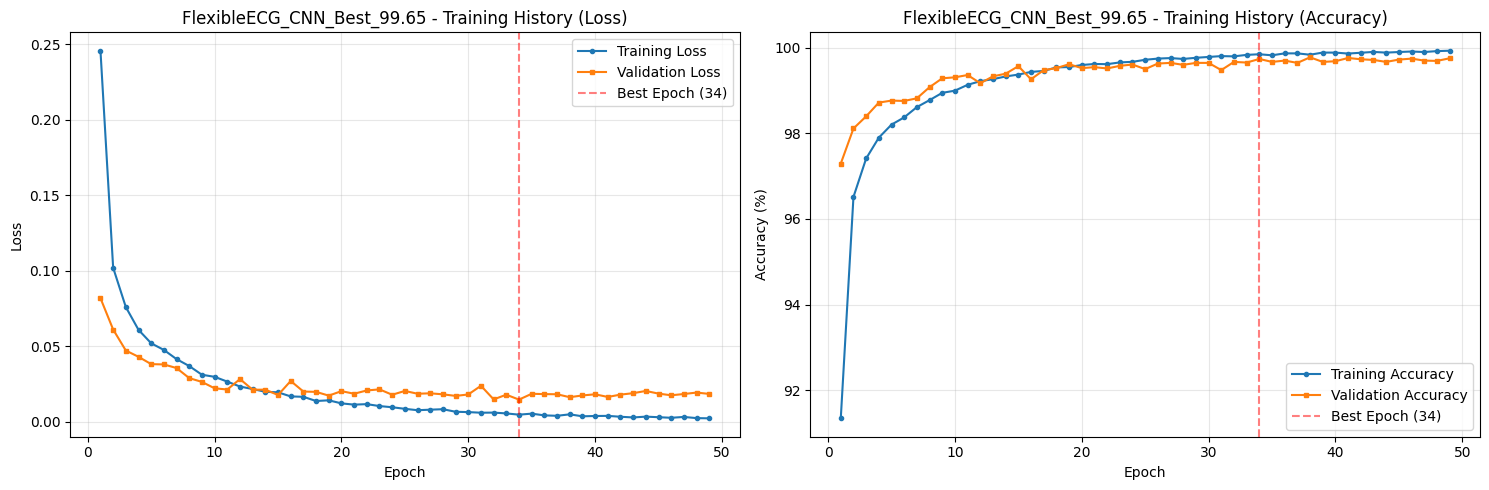


EVALUATING ON TEST SET



Testing: 100%|██████████| 172/172 [00:00<00:00, 261.12it/s]



Classification Report (FlexibleECG_CNN_Best_99.65):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.85      0.86      0.85       556
           2       0.98      0.97      0.97      1448
           3       0.74      0.84      0.79       162
           4       1.00      1.00      1.00      1608

    accuracy                           0.99     21892
   macro avg       0.91      0.93      0.92     21892
weighted avg       0.99      0.99      0.99     21892



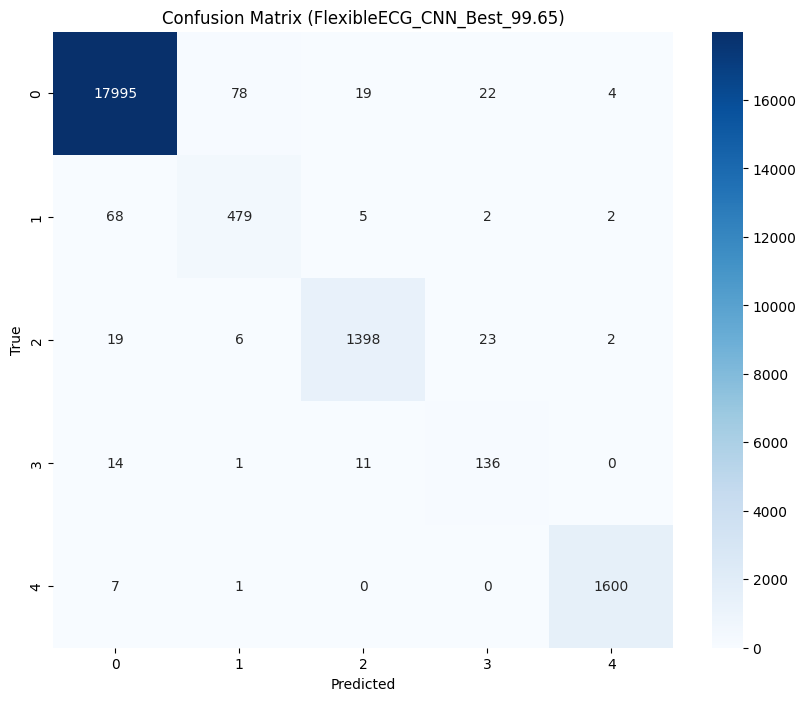


Model and results saved to: models\FlexibleECG_CNN_Best_99.65_20251103_173342

TOP 5 CONFIGURATIONS FROM RANDOM SEARCH
1. Val Acc: 99.65% - 128 filters, kernel 3, 5 res blocks, 0.1 dropout, 128 FC, lr 0.001 ← TRAINED
2. Val Acc: 99.60% - 128 filters, kernel 5, 5 res blocks, 0.2 dropout, 64 FC, lr 0.001 
3. Val Acc: 99.55% - 128 filters, kernel 7, 2 res blocks, 0.2 dropout, 64 FC, lr 0.001 
4. Val Acc: 99.46% - 64 filters, kernel 5, 4 res blocks, 0.2 dropout, 64 FC, lr 0.001 
5. Val Acc: 99.33% - 32 filters, kernel 9, 3 res blocks, 0.2 dropout, 256 FC, lr 0.001 



In [114]:
# Train the best model configuration and evaluate it

# Best parameters from the second random search
best_params = {
    'num_filters': 128,
    'kernel_size': 3,
    'num_res_blocks': 5,
    'dropout_rate': 0.1,
    'fc_neurons': 128,
    'learning_rate': 0.001,
    'batch_size': 128,
    'weight_decay': 1e-05
}

print("Training model with best configuration (99.65% validation accuracy)...")
print(f"Parameters: {best_params}\n")

# Create the best model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sequence_length = X_train.shape[1]
num_classes = len(np.unique(y_train))

best_model = FlexibleECG_CNN(
    input_channels=1,
    num_classes=num_classes,
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    num_res_blocks=best_params['num_res_blocks'],
    dropout_rate=best_params['dropout_rate'],
    fc_neurons=best_params['fc_neurons'],
    sequence_length=sequence_length,
    constant_filters=False  # Default behavior - filters scale with depth
)

# Create data loaders
train_loader = DataLoader(
    ECGDataset(X_train, y_train),
    batch_size=best_params['batch_size'],
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    ECGDataset(X_val, y_val),
    batch_size=best_params['batch_size'],
    num_workers=0
)

test_loader = DataLoader(
    ECGDataset(X_test, y_test),
    batch_size=best_params['batch_size'],
    num_workers=0
)

# Setup training configuration
config = {
    'initial_lr': best_params['learning_rate'],
    'max_lr': best_params['learning_rate'] * 2,
    'warmup_epochs': 5,
    'num_epochs': 50,
    'weight_decay': best_params['weight_decay']
}

criterion = nn.CrossEntropyLoss()

# Initialize the trainer
trainer = ModelTrainer(
    model=best_model,
    model_name='FlexibleECG_CNN_Best_99.65',
    device=device,
    criterion=criterion,
    config=config,
    early_stopping_patience=15
)

# Train the model
trainer.train(train_loader, val_loader, num_epochs=config['num_epochs'])

# Plot training history
trainer.plot_training_history()

# Evaluate on test set
print("\n" + "="*70)
print("EVALUATING ON TEST SET")
print("="*70 + "\n")
trainer.evaluate(test_loader)

# Save detailed results
print(f"\nModel and results saved to: {trainer.save_dir}")

# Print comparison with top configurations
print("\n" + "="*70)
print("TOP 5 CONFIGURATIONS FROM RANDOM SEARCH")
print("="*70)
top_configs = [
    (99.65, "128 filters, kernel 3, 5 res blocks, 0.1 dropout, 128 FC, lr 0.001"),
    (99.60, "128 filters, kernel 5, 5 res blocks, 0.2 dropout, 64 FC, lr 0.001"),
    (99.55, "128 filters, kernel 7, 2 res blocks, 0.2 dropout, 64 FC, lr 0.001"),
    (99.46, "64 filters, kernel 5, 4 res blocks, 0.2 dropout, 64 FC, lr 0.001"),
    (99.33, "32 filters, kernel 9, 3 res blocks, 0.2 dropout, 256 FC, lr 0.001")
]

for i, (acc, desc) in enumerate(top_configs, 1):
    status = "← TRAINED" if i == 1 else ""
    print(f"{i}. Val Acc: {acc:.2f}% - {desc} {status}")

print("\n" + "="*70)

# Final Architecture

In [128]:
import math

In [132]:
def calculate_output_length(input_length, kernel_size, stride, padding=0):
    """Calculate output length after conv/pool operation"""
    return math.floor((input_length + 2 * padding - kernel_size) / stride + 1)


def validate_architecture(sequence_length, num_res_blocks, pool_size, pool_stride):
    """
    Validate that the architecture won't cause sequence length to become 0
    
    Returns:
        (valid, final_length, error_message)
    """
    current_length = sequence_length
    
    for i in range(num_res_blocks):
        # After maxpool
        current_length = calculate_output_length(current_length, pool_size, pool_stride)
        
        if current_length <= 0:
            return False, 0, f"Sequence becomes 0 at block {i+1}/{num_res_blocks}"
    
    if current_length < 1:
        return False, current_length, "Final sequence length too small"
    
    return True, current_length, "Valid"


class FinalResidualBlock(nn.Module):
    """
    Final residual block with validation
    """
    def __init__(self, in_channels, out_channels, kernel_size=5, pool_size=5, pool_stride=2):
        super(FinalResidualBlock, self).__init__()
        
        # First conv layer
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, 
                               padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu1 = nn.ReLU()
        
        # Second conv layer
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, 
                               padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        
        # Skip connection
        self.skip_connection = nn.Conv1d(in_channels, out_channels, kernel_size=1) \
            if in_channels != out_channels else nn.Identity()
        
        # ReLU after adding skip connection
        self.relu2 = nn.ReLU()
        
        # Max pooling
        self.pool = nn.MaxPool1d(kernel_size=pool_size, stride=pool_stride)
        
    def forward(self, x):
        # Store input for skip connection
        identity = self.skip_connection(x)
        
        # First conv block
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        
        # Second conv block
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Add skip connection
        out = out + identity
        out = self.relu2(out)
        
        # Max pooling
        out = self.pool(out)
        
        return out


class FlexibleFinalCNN(nn.Module):
    """
    Flexible final CNN with validation to prevent pooling errors
    """
    def __init__(self, input_channels=1, num_classes=5, num_filters=32, 
                 kernel_size=5, num_res_blocks=5, pool_size=5, pool_stride=2,
                 fc_neurons=32, dropout_rate=0.3, sequence_length=187,
                 constant_filters=True):
        super(FlexibleFinalCNN, self).__init__()
        
        # Validate architecture before building
        valid, final_length, msg = validate_architecture(
            sequence_length, num_res_blocks, pool_size, pool_stride
        )
        
        if not valid:
            raise ValueError(
                f"Invalid architecture: {msg}\n"
                f"Input length: {sequence_length}, Blocks: {num_res_blocks}, "
                f"Pool: {pool_size}/{pool_stride}\n"
                f"Try: fewer blocks, smaller pool_size, or larger pool_stride"
            )
        
        self.num_res_blocks = num_res_blocks
        self.constant_filters = constant_filters
        
        # Build residual blocks dynamically
        self.res_blocks = nn.ModuleList()
        current_filters = input_channels
        
        for i in range(num_res_blocks):
            if constant_filters:
                out_filters = num_filters
            else:
                out_filters = min(num_filters * (2 ** (i // 2)), 256)
            
            self.res_blocks.append(
                FinalResidualBlock(
                    current_filters, 
                    out_filters,
                    kernel_size=kernel_size,
                    pool_size=pool_size,
                    pool_stride=pool_stride
                )
            )
            current_filters = out_filters
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Calculate flattened feature size
        self._feature_size = self._get_feature_size(input_channels, sequence_length)
        
        # Fully connected layers (paper-style: fc_neurons → fc_neurons → output)
        self.fc1 = nn.Linear(self._feature_size, fc_neurons)
        self.relu_fc1 = nn.ReLU()
        
        self.fc2 = nn.Linear(fc_neurons, fc_neurons)
        self.relu_fc2 = nn.ReLU()
        
        # Output layer
        self.fc3 = nn.Linear(fc_neurons, num_classes)
        
        # Initialize weights
        self._init_weights()
    
    def _get_feature_size(self, input_channels, sequence_length):
        """Calculate the size of flattened features after all residual blocks"""
        x = torch.randn(1, input_channels, sequence_length)
        
        for res_block in self.res_blocks:
            x = res_block(x)
        
        return x.view(1, -1).size(1)
    
    def _init_weights(self):
        """Initialize weights using He initialization for ReLU"""
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        """Forward pass"""
        # Reshape for 1D convolution
        x = x.transpose(1, 2)
        
        # Residual blocks
        for res_block in self.res_blocks:
            x = res_block(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.relu_fc1(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu_fc2(x)
        x = self.dropout(x)
        
        # Output layer
        x = self.fc3(x)
        
        return x
    
    def count_parameters(self):
        """Count total and trainable parameters"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"\nModel Parameters:")
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")
        return total_params, trainable_params

In [133]:
def train_and_evaluate_final(model, train_loader, val_loader, criterion, optimizer, 
                                   device, num_epochs=30, patience=10):
    """Train and evaluate model with early stopping"""
    model = model.to(device)
    best_val_acc = 0
    epochs_no_improve = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
        
        val_acc = 100 * correct / total
        
        # Early stopping check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"  Early stopping at epoch {epoch+1}")
            break
    
    return best_val_acc


def random_search_final(X_train, X_val, X_test, y_train, y_val, y_test, 
                              n_iterations=50, constant_filters=True):
    """
    Random search with validation to skip invalid architectures
    """
    import random
    from torch.utils.data import DataLoader
    import torch.optim as optim
    
    # Define hyperparameter ranges with safer defaults
    param_ranges = {
        'num_filters': [16, 32, 64, 128],
        'kernel_size': [3, 5, 7, 9],
        'num_res_blocks': [2, 3, 4, 5],
        'pool_size': [2, 3, 5],      # Safer range
        'pool_stride': [2],           # Keep stride at 2 for safety
        'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
        'fc_neurons': [32, 64, 128, 256],
        'learning_rate': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
        'batch_size': [32, 64, 128],
        'weight_decay': [0, 1e-5, 1e-4, 1e-3],
    }
    
    results = []
    best_val_acc = 0
    best_params = None
    skipped = 0
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    sequence_length = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    
    filter_mode = "CONSTANT" if constant_filters else "SCALING"
    
    print("="*70)
    print(f"RANDOM SEARCH: FINAL ARCHITECTURE ({filter_mode} FILTERS)")
    print("="*70)
    print(f"Iterations: {n_iterations}")
    print(f"Device: {device}")
    print(f"Dataset: {X_train.shape[0]} train, {X_val.shape[0]} val samples")
    print(f"Sequence length: {sequence_length}, Classes: {num_classes}")
    print(f"Architecture: Final architecture with validation")
    print(f"Filter mode: {filter_mode}")
    print("="*70 + "\n")
    
    iteration = 0
    attempts = 0
    max_attempts = n_iterations * 3  # Allow some retries for invalid configs
    
    while iteration < n_iterations and attempts < max_attempts:
        attempts += 1
        
        # Randomly sample hyperparameters
        params = {
            key: random.choice(values) 
            for key, values in param_ranges.items()
        }
        
        # Validate architecture before creating model
        valid, final_len, msg = validate_architecture(
            sequence_length, 
            params['num_res_blocks'], 
            params['pool_size'], 
            params['pool_stride']
        )
        
        if not valid:
            skipped += 1
            print(f"⊘ Skipped invalid config: {msg} "
                  f"(blocks={params['num_res_blocks']}, pool={params['pool_size']}/{params['pool_stride']})")
            continue
        
        iteration += 1
        
        print(f"\n{'='*70}")
        print(f"Iteration {iteration}/{n_iterations} (Skipped: {skipped})")
        print(f"Filters: {params['num_filters']} ({filter_mode.lower()}) × {params['num_res_blocks']} blocks")
        print(f"Kernel: {params['kernel_size']}, Pool: {params['pool_size']}/{params['pool_stride']} → final_len={final_len}")
        print(f"Dropout: {params['dropout_rate']}, FC: {params['fc_neurons']} → {params['fc_neurons']} → {num_classes}")
        print(f"LR: {params['learning_rate']}, Batch: {params['batch_size']}, WD: {params['weight_decay']}")
        print(f"{'='*70}")
        
        try:
            # Create model
            model = FlexibleFinalCNN(
                input_channels=1,
                num_classes=num_classes,
                num_filters=params['num_filters'],
                kernel_size=params['kernel_size'],
                num_res_blocks=params['num_res_blocks'],
                pool_size=params['pool_size'],
                pool_stride=params['pool_stride'],
                fc_neurons=params['fc_neurons'],
                dropout_rate=params['dropout_rate'],
                sequence_length=sequence_length,
                constant_filters=constant_filters
            )
            
            # Create data loaders
            train_loader = DataLoader(
                ECGDataset(X_train, y_train),
                batch_size=params['batch_size'],
                shuffle=True,
                num_workers=0
            )
            val_loader = DataLoader(
                ECGDataset(X_val, y_val),
                batch_size=params['batch_size'],
                num_workers=0
            )
            
            # Setup training
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.AdamW(
                model.parameters(),
                lr=params['learning_rate'],
                weight_decay=params['weight_decay']
            )
            
            # Train with early stopping
            val_acc = train_and_evaluate_final(
                model, train_loader, val_loader,
                criterion, optimizer, device,
                num_epochs=30,
                patience=10
            )
            
            # Store results
            result = {
                'params': params,
                'val_accuracy': val_acc,
                'iteration': iteration,
                'constant_filters': constant_filters,
                'architecture': 'final',
                'final_sequence_length': final_len
            }
            results.append(result)
            
            print(f"  ✓ Validation Accuracy: {val_acc:.2f}%")
            
            # Update best
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = params.copy()
                print(f"  🎯 NEW BEST: {val_acc:.2f}%")
                
        except Exception as e:
            print(f"  ✗ Error: {str(e)}")
            import traceback
            traceback.print_exc()
            continue
    
    # Sort results by accuracy
    results_sorted = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)
    
    # Print final results
    print(f"\n{'='*70}")
    print(f"RANDOM SEARCH COMPLETE - FINAL ARCHITECTURE ({filter_mode} FILTERS)")
    print(f"{'='*70}")
    print(f"Completed iterations: {len(results)}/{n_iterations}")
    print(f"Skipped invalid configs: {skipped}")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"\nBest parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    print(f"\n{'='*70}")
    print(f"Top 10 Configurations:")
    print(f"{'='*70}")
    for i, result in enumerate(results_sorted[:10], 1):
        p = result['params']
        print(f"\n{i}. Val Acc: {result['val_accuracy']:.2f}%")
        print(f"   {p['num_filters']} filters × {p['num_res_blocks']} blocks ({filter_mode.lower()})")
        print(f"   Kernel={p['kernel_size']}, Pool={p['pool_size']}/{p['pool_stride']}")
        print(f"   Dropout={p['dropout_rate']}, FC={p['fc_neurons']}→{p['fc_neurons']}→{num_classes}")
        print(f"   LR={p['learning_rate']}, Batch={p['batch_size']}, WD={p['weight_decay']}")
    
    print("="*70)
    
    return results, best_params, results_sorted

In [134]:
results_final, best_params_final, sorted_final = random_search_final(
    X_train, X_val, X_test, y_train, y_val, y_test,
    n_iterations=50,
    constant_filters=True
)

RANDOM SEARCH: FINAL ARCHITECTURE (CONSTANT FILTERS)
Iterations: 50
Device: cuda
Dataset: 117401 train, 13045 val samples
Sequence length: 187, Classes: 5
Architecture: Final architecture with validation
Filter mode: CONSTANT


Iteration 1/50 (Skipped: 0)
Filters: 16 (constant) × 3 blocks
Kernel: 5, Pool: 5/2 → final_len=20
Dropout: 0.3, FC: 64 → 64 → 5
LR: 0.001, Batch: 64, WD: 0.0001
  ✓ Validation Accuracy: 98.55%
  🎯 NEW BEST: 98.55%

Iteration 2/50 (Skipped: 0)
Filters: 16 (constant) × 5 blocks
Kernel: 7, Pool: 5/2 → final_len=2
Dropout: 0.1, FC: 64 → 64 → 5
LR: 5e-05, Batch: 64, WD: 1e-05
  ✓ Validation Accuracy: 97.84%

Iteration 3/50 (Skipped: 0)
Filters: 128 (constant) × 4 blocks
Kernel: 3, Pool: 2/2 → final_len=11
Dropout: 0.4, FC: 256 → 256 → 5
LR: 0.0001, Batch: 32, WD: 1e-05
  ✓ Validation Accuracy: 99.21%
  🎯 NEW BEST: 99.21%

Iteration 4/50 (Skipped: 0)
Filters: 128 (constant) × 2 blocks
Kernel: 3, Pool: 5/2 → final_len=44
Dropout: 0.4, FC: 64 → 64 → 5
LR: 0.0005, Batch:

Training model with best configuration with fixed filter (99.62% validation accuracy)...
Parameters: {'num_filters': 128, 'kernel_size': 5, 'num_res_blocks': 5, 'pool_size': 3, 'pool_stride': 2, 'dropout_rate': 0.2, 'fc_neurons': 32, 'learning_rate': 0.0005, 'batch_size': 64, 'weight_decay': 1e-05}


Starting training for FlexibleFinalCNN_Best_99.62...
Early stopping enabled with patience=10


Training: 100%|██████████| 1835/1835 [00:22<00:00, 82.48it/s]



Epoch [1/50]
Train Loss: 1.9607, Train Acc: 33.64%
Val Loss: 1.5608, Val Acc: 33.34%
Learning Rate: 0.000600
✓ New best model saved! (Val Loss: 1.5608)
Validation loss improved to 1.5608


Training: 100%|██████████| 1835/1835 [00:20<00:00, 89.63it/s]



Epoch [2/50]
Train Loss: 1.5569, Train Acc: 34.21%
Val Loss: 1.4914, Val Acc: 37.46%
Learning Rate: 0.000700
✓ New best model saved! (Val Loss: 1.4914)
Validation loss improved to 1.4914


Training: 100%|██████████| 1835/1835 [00:20<00:00, 90.24it/s]



Epoch [3/50]
Train Loss: 1.4975, Train Acc: 37.63%
Val Loss: 1.4569, Val Acc: 39.01%
Learning Rate: 0.000800
✓ New best model saved! (Val Loss: 1.4569)
Validation loss improved to 1.4569


Training: 100%|██████████| 1835/1835 [00:20<00:00, 90.37it/s]



Epoch [4/50]
Train Loss: 1.3885, Train Acc: 42.84%
Val Loss: 0.9361, Val Acc: 61.81%
Learning Rate: 0.000900
✓ New best model saved! (Val Loss: 0.9361)
Validation loss improved to 0.9361


Training: 100%|██████████| 1835/1835 [00:20<00:00, 87.93it/s]



Epoch [5/50]
Train Loss: 0.9664, Train Acc: 59.53%
Val Loss: 0.8222, Val Acc: 63.33%
Learning Rate: 0.001000
✓ New best model saved! (Val Loss: 0.8222)
Validation loss improved to 0.8222


Training: 100%|██████████| 1835/1835 [00:20<00:00, 89.14it/s]



Epoch [6/50]
Train Loss: 0.8603, Train Acc: 62.63%
Val Loss: 0.8875, Val Acc: 61.70%
Learning Rate: 0.000999
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:20<00:00, 89.21it/s]



Epoch [7/50]
Train Loss: 0.7837, Train Acc: 64.58%
Val Loss: 0.4816, Val Acc: 80.53%
Learning Rate: 0.000998
✓ New best model saved! (Val Loss: 0.4816)
Validation loss improved to 0.4816


Training: 100%|██████████| 1835/1835 [00:20<00:00, 89.49it/s]



Epoch [8/50]
Train Loss: 0.4995, Train Acc: 81.74%
Val Loss: 0.2234, Val Acc: 95.02%
Learning Rate: 0.000995
✓ New best model saved! (Val Loss: 0.2234)
Validation loss improved to 0.2234


Training: 100%|██████████| 1835/1835 [00:21<00:00, 87.37it/s]



Epoch [9/50]
Train Loss: 0.3446, Train Acc: 89.62%
Val Loss: 0.1542, Val Acc: 96.77%
Learning Rate: 0.000990
✓ New best model saved! (Val Loss: 0.1542)
Validation loss improved to 0.1542


Training: 100%|██████████| 1835/1835 [00:20<00:00, 90.36it/s]



Epoch [10/50]
Train Loss: 0.2311, Train Acc: 93.87%
Val Loss: 0.1196, Val Acc: 97.13%
Learning Rate: 0.000985
✓ New best model saved! (Val Loss: 0.1196)
Validation loss improved to 0.1196


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.12it/s] 



Epoch [11/50]
Train Loss: 0.1722, Train Acc: 95.77%
Val Loss: 0.1031, Val Acc: 97.54%
Learning Rate: 0.000978
✓ New best model saved! (Val Loss: 0.1031)
Validation loss improved to 0.1031


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.36it/s] 



Epoch [12/50]
Train Loss: 0.1429, Train Acc: 96.58%
Val Loss: 0.0740, Val Acc: 98.28%
Learning Rate: 0.000971
✓ New best model saved! (Val Loss: 0.0740)
Validation loss improved to 0.0740


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.54it/s]



Epoch [13/50]
Train Loss: 0.1225, Train Acc: 97.15%
Val Loss: 0.0569, Val Acc: 98.69%
Learning Rate: 0.000962
✓ New best model saved! (Val Loss: 0.0569)
Validation loss improved to 0.0569


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.46it/s] 



Epoch [14/50]
Train Loss: 0.0941, Train Acc: 97.81%
Val Loss: 0.0729, Val Acc: 98.05%
Learning Rate: 0.000952
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.35it/s] 



Epoch [15/50]
Train Loss: 0.0755, Train Acc: 98.20%
Val Loss: 0.0433, Val Acc: 98.90%
Learning Rate: 0.000942
✓ New best model saved! (Val Loss: 0.0433)
Validation loss improved to 0.0433


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.22it/s] 



Epoch [16/50]
Train Loss: 0.0607, Train Acc: 98.55%
Val Loss: 0.0354, Val Acc: 99.12%
Learning Rate: 0.000930
✓ New best model saved! (Val Loss: 0.0354)
Validation loss improved to 0.0354


Training: 100%|██████████| 1835/1835 [00:18<00:00, 97.92it/s]



Epoch [17/50]
Train Loss: 0.0514, Train Acc: 98.77%
Val Loss: 0.0570, Val Acc: 98.73%
Learning Rate: 0.000917
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.22it/s] 



Epoch [18/50]
Train Loss: 0.0442, Train Acc: 98.97%
Val Loss: 0.0361, Val Acc: 99.26%
Learning Rate: 0.000904
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.08it/s] 



Epoch [19/50]
Train Loss: 0.0353, Train Acc: 99.18%
Val Loss: 0.0672, Val Acc: 98.86%
Learning Rate: 0.000890
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.08it/s] 



Epoch [20/50]
Train Loss: 0.0347, Train Acc: 99.21%
Val Loss: 0.0378, Val Acc: 99.23%
Learning Rate: 0.000875
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:18<00:00, 98.19it/s] 



Epoch [21/50]
Train Loss: 0.0290, Train Acc: 99.33%
Val Loss: 0.0413, Val Acc: 99.27%
Learning Rate: 0.000860
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 94.68it/s]



Epoch [22/50]
Train Loss: 0.0280, Train Acc: 99.39%
Val Loss: 0.0385, Val Acc: 99.27%
Learning Rate: 0.000844
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 94.24it/s]



Epoch [23/50]
Train Loss: 0.0245, Train Acc: 99.47%
Val Loss: 0.0359, Val Acc: 99.43%
Learning Rate: 0.000827
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 94.05it/s]



Epoch [24/50]
Train Loss: 0.0243, Train Acc: 99.52%
Val Loss: 0.0394, Val Acc: 99.39%
Learning Rate: 0.000810
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.84it/s]



Epoch [25/50]
Train Loss: 0.0201, Train Acc: 99.56%
Val Loss: 0.0337, Val Acc: 99.47%
Learning Rate: 0.000793
✓ New best model saved! (Val Loss: 0.0337)
Validation loss improved to 0.0337


Training: 100%|██████████| 1835/1835 [00:19<00:00, 94.01it/s]



Epoch [26/50]
Train Loss: 0.0184, Train Acc: 99.58%
Val Loss: 0.0413, Val Acc: 99.43%
Learning Rate: 0.000776
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.60it/s]



Epoch [27/50]
Train Loss: 0.0168, Train Acc: 99.64%
Val Loss: 0.0451, Val Acc: 99.36%
Learning Rate: 0.000759
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.44it/s]



Epoch [28/50]
Train Loss: 0.0169, Train Acc: 99.62%
Val Loss: 0.0331, Val Acc: 99.56%
Learning Rate: 0.000741
✓ New best model saved! (Val Loss: 0.0331)
Validation loss improved to 0.0331


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.99it/s]



Epoch [29/50]
Train Loss: 0.0138, Train Acc: 99.72%
Val Loss: 0.0399, Val Acc: 99.42%
Learning Rate: 0.000724
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.91it/s]



Epoch [30/50]
Train Loss: 0.0146, Train Acc: 99.71%
Val Loss: 0.0281, Val Acc: 99.59%
Learning Rate: 0.000707
✓ New best model saved! (Val Loss: 0.0281)
Validation loss improved to 0.0281


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.30it/s]



Epoch [31/50]
Train Loss: 0.0129, Train Acc: 99.72%
Val Loss: 0.0489, Val Acc: 99.43%
Learning Rate: 0.000690
EarlyStopping counter: 1 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 94.23it/s]



Epoch [32/50]
Train Loss: 0.0117, Train Acc: 99.76%
Val Loss: 0.0349, Val Acc: 99.63%
Learning Rate: 0.000673
EarlyStopping counter: 2 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.85it/s]



Epoch [33/50]
Train Loss: 0.0101, Train Acc: 99.78%
Val Loss: 0.0341, Val Acc: 99.51%
Learning Rate: 0.000656
EarlyStopping counter: 3 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.91it/s]



Epoch [34/50]
Train Loss: 0.0112, Train Acc: 99.78%
Val Loss: 0.0410, Val Acc: 99.54%
Learning Rate: 0.000640
EarlyStopping counter: 4 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.96it/s]



Epoch [35/50]
Train Loss: 0.0094, Train Acc: 99.80%
Val Loss: 0.0408, Val Acc: 99.64%
Learning Rate: 0.000625
EarlyStopping counter: 5 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.96it/s]



Epoch [36/50]
Train Loss: 0.0087, Train Acc: 99.84%
Val Loss: 0.0392, Val Acc: 99.56%
Learning Rate: 0.000610
EarlyStopping counter: 6 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.89it/s]



Epoch [37/50]
Train Loss: 0.0096, Train Acc: 99.82%
Val Loss: 0.0363, Val Acc: 99.52%
Learning Rate: 0.000596
EarlyStopping counter: 7 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.94it/s]



Epoch [38/50]
Train Loss: 0.0076, Train Acc: 99.85%
Val Loss: 0.0531, Val Acc: 99.59%
Learning Rate: 0.000583
EarlyStopping counter: 8 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.90it/s]



Epoch [39/50]
Train Loss: 0.0086, Train Acc: 99.85%
Val Loss: 0.0574, Val Acc: 99.39%
Learning Rate: 0.000570
EarlyStopping counter: 9 out of 10


Training: 100%|██████████| 1835/1835 [00:19<00:00, 93.85it/s]



Epoch [40/50]
Train Loss: 0.0070, Train Acc: 99.88%
Val Loss: 0.0427, Val Acc: 99.66%
Learning Rate: 0.000558
EarlyStopping counter: 10 out of 10

Early stopping triggered! No improvement for 10 epochs.
Best validation loss: 0.0281 at epoch 30

Training stopped early at epoch 40
Best validation loss: 0.0281
Best epoch: 30


Training Summary for FlexibleFinalCNN_Best_99.62
Total epochs trained: 40
Best validation loss: 0.0281
Final train accuracy: 99.88%
Final validation accuracy: 99.66%



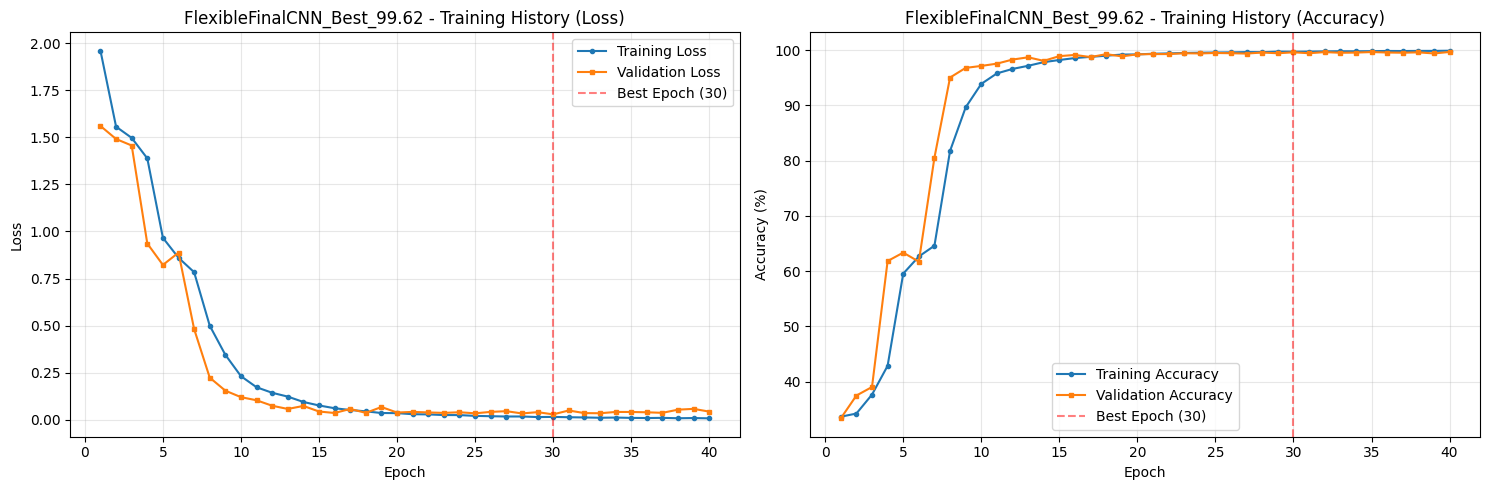


EVALUATING ON TEST SET



Testing: 100%|██████████| 343/343 [00:01<00:00, 261.02it/s]



Classification Report (FlexibleFinalCNN_Best_99.62):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.83      0.86      0.84       556
           2       0.96      0.97      0.96      1448
           3       0.80      0.85      0.82       162
           4       1.00      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.92      0.93      0.92     21892
weighted avg       0.99      0.99      0.99     21892



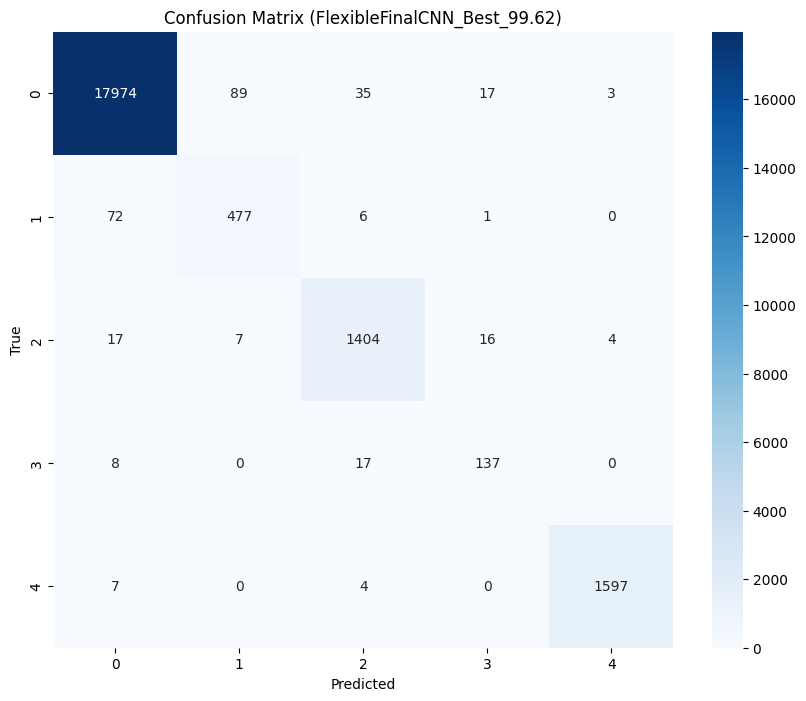


Model and results saved to: models\FlexibleFinalCNN_Best_99.62_20251104_012201


In [ ]:
best_params = {
    'num_filters': 128,
    'kernel_size': 5,
    'num_res_blocks': 5,
    'pool_size': 3,           # ← You need this
    'pool_stride': 2,         # ← You need this
    'dropout_rate': 0.2,
    'fc_neurons': 32,
    'learning_rate': 0.0005,  
    'batch_size': 64,
    'weight_decay': 1e-5
}

print("Training model with best configuration with fixed filter (99.62% validation accuracy)...")
print(f"Parameters: {best_params}\n")

# Create the best model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sequence_length = X_train.shape[1]
num_classes = len(np.unique(y_train))

best_model = FlexibleFinalCNN(
    input_channels=1,
    num_classes=num_classes,
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    num_res_blocks=best_params['num_res_blocks'],
    pool_size=best_params['pool_size'],        # ← ADD THIS
    pool_stride=best_params['pool_stride'],    # ← ADD THIS
    fc_neurons=best_params['fc_neurons'],
    dropout_rate=best_params['dropout_rate'],
    sequence_length=sequence_length,
    constant_filters=True  
)

# Create data loaders
train_loader = DataLoader(
    ECGDataset(X_train, y_train),
    batch_size=best_params['batch_size'],
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    ECGDataset(X_val, y_val),
    batch_size=best_params['batch_size'],
    num_workers=0
)

test_loader = DataLoader(
    ECGDataset(X_test, y_test),
    batch_size=best_params['batch_size'],
    num_workers=0
)

# Setup training configuration
config = {
    'initial_lr': best_params['learning_rate'],
    'max_lr': best_params['learning_rate'] * 2,
    'warmup_epochs': 5,
    'num_epochs': 50,
    'weight_decay': best_params['weight_decay']
}

criterion = nn.CrossEntropyLoss()

# Initialize the trainer
trainer = ModelTrainer(
    model=best_model,
    model_name='FlexibleFinalCNN_Best_99.62',  # ← FIXED NAME
    device=device,
    criterion=criterion,
    config=config,
    early_stopping_patience=10
)

# Train the model
trainer.train(train_loader, val_loader, num_epochs=config['num_epochs'])

# Plot training history
trainer.plot_training_history()

# Evaluate on test set
print("\n" + "="*70)
print("EVALUATING ON TEST SET")
print("="*70 + "\n")
trainer.evaluate(test_loader)

# Save detailed results
print(f"\nModel and results saved to: {trainer.save_dir}")